### DSA Main Project
### Title: Hospital Readmission Prediction Model
### Submitted by: Batch 4 - Group 6
### Contributors: Ashmina T, Fen Francis Pereira, Jayaram K

In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mounting drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the csv file
data = pd.read_csv('/content/drive/My Drive/Group-6:Main Project/hospital_re-admission.csv')

###Data Understanding

In [ ]:
#displaying all the columns and 5 rows of the data
pd.set_option('display.max_columns',None)
data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Feature description  
- **encounter_id**: Unique identifier of an encounter
- **patient_nbr**: Unique identifier of a patient
- **race**: Values: Caucasian, Asian, African American, Hispanic, and other
- **gender**: Values: male, female, and unknown/invalid
- **age**: Grouped in 10-year intervals: [0,10), [10,20), [20,30), .... , [90,100)
- **weight**: Weight in pounds
- **admission_type_id**: Integer identifier corresponding to 8 distinct values, for example, emergency, urgent, elective, newborn, and not available. 
- **discharge_disposition_id**: Integer identifier corresponding to 30 distinct values, for example, discharged to home, expired, and not available
- **admission_source_id**: Integer identifier corresponding to 25 distinct values, for example, physician referral, emergency room, and transfer from a hospital
- **time_in_hospital**: Integer number of days between admission and discharge
- **payer_code**: Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay
- **medical_specialty**: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
- **num_lab_procedures**: Number of lab tests performed during the encounter
- **num_procedures**: Number of procedures (other than lab tests) performed during the encounter
- **num_medications**: Number of distinct generic names administered during the encounter
- **number_outpatient**: Number of outpatient visits of the patient in the year preceding the encounter
- **number_emergency**: Number of emergency visits of the patient in the year preceding the encounter
- **number_inpatient**: Number of inpatient visits of the patient in the year preceding the encounter
- **diag_1**: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
- **diag_2**: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
- **diag_3**: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
- **number_diagnoses**: Number of diagnoses entered to the system
- **max_glu_serum**: Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
- **A1Cresult**: Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
- **change**: Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
- **diabetesMed**: Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
- 23 features for medications: For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone,** and **metformin-pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
- **readmitted**: Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.

In [ ]:
#checking the shape of the dataset
data.shape

(101766, 50)

There are 101766 rows and 50 columns

In [ ]:
#getting the concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

###Pre-processing(Stage 1)

The features 'admission_type_id', 'discharge_type_id', 'admission_source_id' are categorical but their data type is given as int64. So, that should be converted into object type.

In [ ]:
#changing the data type of the three columns
data['admission_type_id'] = data['admission_type_id'].astype('object')
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype('object')
data['admission_source_id'] = data['admission_source_id'].astype('object')

**Missing value detection**

In [ ]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

 Handling Missing Values

In this dataset, missing values are represented by '?' sign. So, we are replacing that with nan.

In [ ]:
# in the data set '?' used for null values, hence replacing '?' with nan
data = data.replace('?',np.nan)

In [ ]:
#checking for missing values
#displaying names of the columns containing missing values along with the count of missing values 
col_nullCount = data.isna().sum()
col_nullCount[col_nullCount>0]

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64

These are the features containing missing values and we will process each of these columns separately.

In [ ]:
# chi-square test for identifying significant relation between columns with nan and the target column 'readmitted'
from scipy.stats import chi2_contingency
# creating a list of null value columns
nan_columns = ['race','weight','payer_code','medical_specialty','diag_1','diag_2','diag_3']
print("Diplaying the Features that are having nan which got significant relation with the target column 'readmitted':")
for feature in nan_columns:
    crosstabres = pd.crosstab(index=data[feature],columns=data['readmitted'])
    res =chi2_contingency(crosstabres)
    if res[1] < 0.01:
        print(feature,end=", ")

Diplaying the Features that are having nan which got significant relation with the target column 'readmitted':
race, payer_code, medical_specialty, diag_1, diag_2, diag_3, 

We see that race, payer_code, medical_specialty columns have significant relation with the target column. Hence we don't have to remove these columns.
And, for these columns, we can't infer the missing values from other values(values in the same column or in the other columns). So, we are going to fill the missing values with a new category 'Not Available'.

In [ ]:
#replacing missing values in 'race', 'payer_code', and 'medical_specialty'
data['race'] = data['race'].fillna('Not Available')
data['payer_code'] = data['payer_code'].fillna('Not Available')
data['medical_specialty'] = data['medical_specialty'].fillna('Not Available')

In [ ]:
#displaying unique values in 'weight' column
data['weight'].value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

Here 'weight' column is not having any significant relation with our target column 'readmitted' and there are more than 50% of values missing. So, we can drop that column(Feature reduction).

In [ ]:
#droping 'weight' column
data.drop('weight',axis=1,inplace=True) ##(Feature reduction)

In [ ]:
#displaying unique values in 'race' column
data['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Not Available       2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [ ]:
#displaying unique values in 'payer_code' column
data['payer_code'].value_counts()

Not Available    40256
MC               32439
HM                6274
SP                5007
BC                4655
MD                3532
CP                2533
UN                2448
CM                1937
OG                1033
PO                 592
DM                 549
CH                 146
WC                 135
OT                  95
MP                  79
SI                  55
FR                   1
Name: payer_code, dtype: int64

In [ ]:
#displaying unique values in 'medical_specialty' column
data['medical_specialty'].value_counts()

Not Available                    49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

**Grouping multiple categories of feature and re-coding features (Feature engineering)**

In [ ]:
#displaying unique values in 'diag_1', 'diag_2', and 'diag_3' column
print('diag_1:')
print(data['diag_1'].value_counts())
print('\ndiag_2:')
print(data['diag_2'].value_counts())
print('\ndiag_3:')
print(data['diag_3'].value_counts())

diag_1:
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
817       1
61        1
148       1
870       1
V51       1
Name: diag_1, Length: 716, dtype: int64

diag_2:
276     6752
428     6662
250     6071
427     5036
401     3736
        ... 
232        1
908        1
52         1
E817       1
927        1
Name: diag_2, Length: 748, dtype: int64

diag_3:
250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
657         1
684         1
603         1
E826        1
971         1
Name: diag_3, Length: 789, dtype: int64


These 3 columns contains first three digits of the ICD-9 codes indicating the disease associated with the diagnosis.  
These are the categories of diseases associated with the ICD-9 codes:  
*Circulatory* :    390–459 , 785  
*Respiratory* :    460–519, 786  
*Digestive*   :    520–579, 787  
*Diabetes*    :    250.00  
*Injury*      :    800–999  
*Musculoskeletal* : 710–739  
*Genitourinary* : 580–629, 788  
*Neoplasms*   :    140–239, 780, 781, 784, 790–799, 240–279 without 250, 680–709, 782, 001–139, 290–319  
*Other*       :    E–V,280–289, 320–359, 630–679, 360–389, 740–759  
*Not Available*   :nan

In [ ]:
#grouping 'diag_1', 'diag_2', 'diag_3' column values into respective categories
def diag(x):
    if x is np.nan:
        return 'Not Available'
    if 'E' in str(x) or 'V' in str(x):
        return 'Other'
    x = float(x)
    if (x >= 390 and x <= 459) or x == 785:
        return 'Circulatory'
    elif (x >= 460 and x <= 519) or x == 786:
        return 'Respiratory'
    elif (x >= 520 and x <= 579) or x == 787:
        return 'Digestive'
    elif np.floor(x) == 250:
        return 'Diabetes'
    elif x >= 800 and x <= 999:
        return 'Injury'
    elif x >= 710 and x <= 739:
        return 'Musculoskeletal'
    elif (x >= 580 and x <= 629) or x == 788:
        return 'Genitourinary'
    elif (x >= 1 and x <= 279) or (x >= 290 and x <= 319) or (x >= 680 and x <= 709) or (x >= 780 and x <= 782) or x == 784:
        return 'Neoplasms'
    else:
        return 'Other'

data['diag_1'] = data['diag_1'].apply(diag)
data['diag_2'] = data['diag_2'].apply(diag)
data['diag_3'] = data['diag_3'].apply(diag)

In [ ]:
#displaying unique values in 'diag_1', 'diag_2', and 'diag_3' column
print('diag_1:')
print(data['diag_1'].value_counts())
print('\ndiag_2:')
print(data['diag_2'].value_counts())
print('\ndiag_3:')
print(data['diag_3'].value_counts())

diag_1:
Circulatory        30437
Neoplasms          16058
Respiratory        14423
Digestive           9475
Diabetes            8757
Injury              6974
Other               5547
Genitourinary       5117
Musculoskeletal     4957
Not Available         21
Name: diag_1, dtype: int64

diag_2:
Circulatory        31881
Neoplasms          20827
Diabetes           12794
Respiratory        10895
Genitourinary       8376
Other               8273
Digestive           4170
Injury              2428
Musculoskeletal     1764
Not Available        358
Name: diag_2, dtype: int64

diag_3:
Circulatory        30306
Neoplasms          20314
Diabetes           17157
Other              10737
Respiratory         7358
Genitourinary       6680
Digestive           3930
Injury              1946
Musculoskeletal     1915
Not Available       1423
Name: diag_3, dtype: int64


In [ ]:
# Re-checking for null values
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

- We sucessfully handled all the null values in the dataset.

In [ ]:
#displaying unique values in 'gender' column
data['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

There are 3 rows with gender values as 'Unknown/Invalid'.

In [ ]:
data.loc[data['gender'] == 'Unknown/Invalid'] # refining the dataset

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
30506,98634858,100695042,Other,Unknown/Invalid,[70-80),3,1,1,1,Not Available,Cardiology,5,5,22,0,0,0,Circulatory,Circulatory,Circulatory,4,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO
75551,226864668,60524946,Not Available,Unknown/Invalid,[60-70),1,1,7,1,CP,Not Available,38,1,6,0,0,0,Injury,Injury,Other,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
82573,257364294,78119847,Not Available,Unknown/Invalid,[70-80),1,22,7,8,CP,Not Available,59,2,21,0,0,0,Injury,Injury,Injury,9,None,None,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO


we can consider it as data entry error and so we can remove these 3 rows.

In [ ]:
data.drop([30506,75551,82573], inplace=True)

In [ ]:
#displaying unique values in 'age' column
data['age'].value_counts()

[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

Age is represented as 10 different categories.

In [ ]:
#displaying unique values in 'admission_type_id'
data['admission_type_id'].value_counts()

1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

This field indicates 8 distinct values of patient admission information:  
1 - Emergency  
2 - Urgent  
3 - Elective  
4 - Newborn  
5 - Not Available  
6 - NULL  
7 - Trauma Center  
8 - Not Mapped

We will add 'NULL' and 'Not Mapped' to the category 'Not Available'  

Emergency = 1  
Urgent = 2  
Elective = 3  
Newborn = 4  
Trauma Center = 7  
Not Available = [5,6,8]

In [ ]:
# Grouping multiple categories of feature and re-coding features (Feature engineering)
data['admission_type_id'] = data['admission_type_id'].replace([1], 'Emergency')
data['admission_type_id'] = data['admission_type_id'].replace([2], 'Urgent')
data['admission_type_id'] = data['admission_type_id'].replace([3], 'Elective')
data['admission_type_id'] = data['admission_type_id'].replace([4], 'Newborn')
data['admission_type_id'] = data['admission_type_id'].replace([7], 'Trauma Center') 
data['admission_type_id'] = data['admission_type_id'].replace([5,6,8], 'Not Available') 

In [ ]:
#displaying unique values in discharge_disposition_id
data.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60232
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1992
23      412
24       48
25      989
27        5
28      139
dtype: int64

There are 30 distinct types corresponding to patient discharge information:  
1 Discharged to home  
2 Discharged/transferred to another short term hospital  
3 Discharged/transferred to SNF  
4 Discharged/transferred to ICF  
5 Discharged/transferred to another type of inpatient care institution  
6 Discharged/transferred to home with home health service  
7 Left AMA  
8 Discharged/transferred to home under care of Home IV provider  
9 Admitted as an inpatient to this hospital  
10 Neonate discharged to another hospital for neonatal aftercare  
11 Expired  
12 Still patient or expected to return for outpatient services  
13 Hospice / home  
14 Hospice / medical facility  
15 Discharged/transferred within this institution to Medicare approved swing bed  
16 Discharged/transferred/referred another institution for outpatient services  
17 Discharged/transferred/referred to this institution for outpatient services  
18 NULL  
19 Expired at home. Medicaid only, hospice.  
20 Expired in a medical facility. Medicaid only, hospice.  
21 Expired, place unknown. Medicaid only, hospice.  
22 Discharged/transferred to another rehab fac including rehab units of a hospital .  
23 Discharged/transferred to a long term care hospital.  
24 Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.  
25 Not Mapped  
26 Unknown/Invalid   
27 Discharged/transferred to a federal health care facility.  
28 Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital  
29 Discharged/transferred to a Critical Access Hospital (CAH)  
30 Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere 

Since there are many categories we will group them into 7 main categories:  
1 Discharged to home  
2 Discharged\Trasfered  
3 Hospice  
4 Expired  
5 Left AMA

6 Others  
7 Not Available

In [ ]:
# Grouping multiple categories of feature and re-coding features (Feature engineering)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace([1,6,8], 'Discharged to home')
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace([2,3,4,5,22,23,24,27,28,29,30],'Discharged\Trasfered')
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace([13,14], 'Hospice')
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace([11,19,20,21], 'Expired')
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace([7], 'Left AMA')
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace([9,10,12,15,16,17], 'Others')
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace([18,25,26], 'Not Available')

In [ ]:
#displaying unique values
data.groupby('discharge_disposition_id').size()

discharge_disposition_id
Discharged to home      73242
Discharged\Trasfered    20677
Expired                  1652
Hospice                   771
Left AMA                  623
Not Available            4680
Others                    118
dtype: int64

In [ ]:
#displaying unique values in 'admission_source_id' column
data.groupby('admission_source_id').size()

admission_source_id
1     29564
2      1104
3       187
4      3187
5       855
6      2264
7     57492
8        16
9       125
10        8
11        2
13        1
14        2
17     6781
20      161
22       12
25        2
dtype: int64

1 Physician Referral  
2 Clinic Referral  
3 HMO Referral  
4 Transfer from a hospital  
5 Transfer from a Skilled Nursing Facility (SNF)  
6 Transfer from another health care facility  
7 Emergency Room  
8 Court/Law Enforcement  
9 Not Available    
10 Transfer from critial access hospital  
11 Normal Delivery  
12 Premature Delivery  
13 Sick Baby  
14 Extramural Birth  
15 Not Available  
16 NULL  
17 Transfer From Another Home Health Agency  
18 Readmission to Same Home Health Agency  
19 Not Mapped  
20 Unknown/Invalid  
21 Transfer from hospital inpt/same fac reslt in a sep claim  
22 Born inside this hospital  
23 Born outside this hospital  
24 Transfer from Ambulatory Surgery Center  
25 Transfer from Hospice  

Since there are many categories, we are going to group them into 6 main categories:  
1 - Emergency room  
2 - Referrel  
3 - Trasfer  
4 - New Born  
5 - Others  
6 - Not Available

In [ ]:
# Grouping multiple categories of feature and re-coding features (Feature engineering)
data['admission_source_id'] = data['admission_source_id'].replace([7], 'Emergency room')
data['admission_source_id'] = data['admission_source_id'].replace([1,2,3],'Referrel')
data['admission_source_id'] = data['admission_source_id'].replace([4,5,6,10,17,21,24,25], 'Transfer')
data['admission_source_id'] = data['admission_source_id'].replace([11,12,13,14,22,23], 'New Born')
data['admission_source_id'] = data['admission_source_id'].replace([8,18], 'Others')
data['admission_source_id'] = data['admission_source_id'].replace([9,15,16,19,20], 'Not Available')

In [ ]:
#displaying unique values
data.groupby('admission_source_id').size()

admission_source_id
Emergency room    57492
New Born             17
Not Available       286
Others               16
Referrel          30855
Transfer          13097
dtype: int64

In [ ]:
#'time_in_hospital' column
data.groupby('time_in_hospital').size()

time_in_hospital
1     14206
2     17224
3     17756
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
dtype: int64

This field indicates the number of days the patient stayed in the hospital. Minimum number of days is 1 and maximum number of days is 14.

In [ ]:
#displaying unique values in 'medical_specialty' column
data.groupby('medical_specialty').size()

medical_specialty
AllergyandImmunology                   7
Anesthesiology                        12
Anesthesiology-Pediatric              19
Cardiology                          5351
Cardiology-Pediatric                   7
                                    ... 
Surgery-PlasticwithinHeadandNeck       1
Surgery-Thoracic                     109
Surgery-Vascular                     533
SurgicalSpecialty                     33
Urology                              685
Length: 73, dtype: int64

Since there are many categorical values, we will group them into 12 categories: top 10 specialities,Not Available and an 'other' category.

In [ ]:
#retrieving top 10 specialities
data.groupby('medical_specialty').size().sort_values(ascending = False).head(11)

medical_specialty
Not Available                 49947
InternalMedicine              14635
Emergency/Trauma               7565
Family/GeneralPractice         7440
Cardiology                     5351
Surgery-General                3099
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Radiologist                    1140
Pulmonology                     871
dtype: int64

In [ ]:
# Grouping multiple categories of feature and re-coding features (Feature engineering)
medi_dept_top11 = ['Not Available','InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General','Nephrology','Orthopedics','Orthopedics-Reconstructive','Radiologist','Pulmonology']
# change all other values to 'Others'
data.loc[~data['medical_specialty'].isin(medi_dept_top11) , 'medical_specialty'] = 'Others'

In [ ]:
data.groupby('medical_specialty').size()

medical_specialty
Cardiology                     5351
Emergency/Trauma               7565
Family/GeneralPractice         7440
InternalMedicine              14635
Nephrology                     1613
Not Available                 49947
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Others                         7469
Pulmonology                     871
Radiologist                    1140
Surgery-General                3099
dtype: int64

In [ ]:
#displaying unique values in 'max_glu_serum'
data.groupby('max_glu_serum').size()

max_glu_serum
>200     1485
>300     1264
None    96417
Norm     2597
dtype: int64

In [ ]:
#displaying unique values in 'A1Cresult'
data.groupby('A1Cresult').size()

A1Cresult
>7       3812
>8       8216
None    84745
Norm     4990
dtype: int64

In [ ]:
#displaying unique values in 'change' column
data.groupby('change').size()

change
Ch    47009
No    54754
dtype: int64

In [ ]:
#replacing 'ch' with more meaningful 'Yes'
data['change'] = data['change'].replace(['Ch'], 'Yes')
data.groupby('change').size()

change
No     54754
Yes    47009
dtype: int64

In [ ]:
#displaying unique values in 'diabetesMed' column
data.groupby('diabetesMed').size()

diabetesMed
No     23402
Yes    78361
dtype: int64

In [ ]:
# The 23 different features of medications tried on patient
drug_features = ['metformin', 'repaglinide','nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide','glipizide', 'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide','examide', 'citoglipton', 'insulin', 'glyburide-metformin','glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone', 'metformin-pioglitazone']

#displaying unique values in each medication
for i in drug_features:
    print(i)
    print(data[i].value_counts(),'\n')

metformin
No        81776
Steady    18345
Up         1067
Down        575
Name: metformin, dtype: int64 

repaglinide
No        100224
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64 

nateglinide
No        101060
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64 

chlorpropamide
No        101677
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64 

glimepiride
No        96572
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64 

acetohexamide
No        101762
Steady         1
Name: acetohexamide, dtype: int64 

glipizide
No        89078
Steady    11355
Up          770
Down        560
Name: glipizide, dtype: int64 

glyburide
No        91113
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64 

tolbutamide
No        101740
Steady        23
Name: tolbutamide, dtype: int64 

pioglitazone
No        94436
Steady     6975
Up          234

In [ ]:
#displaying unique values in the target column
data.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54861
dtype: int64

In this data set, we have three levels of readmission: < 30, >30 & No Readmission.  
This makes it a multi-class classification problem. But our aim is to predict whether a patient  gets readmitted or not. So, we will be combining the 'No' and >30  categories into a single class 'No'. This will essentially make it a binary classification problem.

In [ ]:
#making readmitted column binary
data['readmitted'] = data['readmitted'].replace(['<30'], 'Yes')
data['readmitted'] = data['readmitted'].replace(['>30'], 'No')
data['readmitted'] = data['readmitted'].replace(['NO'], 'No')

### Exploratory Data Analysis (EDA)

In [ ]:
#getting the concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101763 non-null  int64 
 1   patient_nbr               101763 non-null  int64 
 2   race                      101763 non-null  object
 3   gender                    101763 non-null  object
 4   age                       101763 non-null  object
 5   admission_type_id         101763 non-null  object
 6   discharge_disposition_id  101763 non-null  object
 7   admission_source_id       101763 non-null  object
 8   time_in_hospital          101763 non-null  int64 
 9   payer_code                101763 non-null  object
 10  medical_specialty         101763 non-null  object
 11  num_lab_procedures        101763 non-null  int64 
 12  num_procedures            101763 non-null  int64 
 13  num_medications           101763 non-null  int64 
 14  numb

In [ ]:
#statistical summary of numerical columns
np.round(data.describe(),decimals=1)

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101763.0,101763.0,101763.0,101763.0,101763.0,101763.0,101763.0,101763.0,101763.0,101763.0
mean,165200788.2,54329650.4,4.4,43.1,1.3,16.0,0.4,0.2,0.6,7.4
std,102641008.2,38696580.0,3.0,19.7,1.7,8.1,1.3,0.9,1.3,1.9
min,12522.0,135.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
25%,84959748.0,23412964.5,2.0,31.0,0.0,10.0,0.0,0.0,0.0,6.0
50%,152388294.0,45500490.0,4.0,44.0,1.0,15.0,0.0,0.0,0.0,8.0
75%,230269803.0,87545713.5,6.0,57.0,2.0,20.0,0.0,0.0,1.0,9.0
max,443867222.0,189502619.0,14.0,132.0,6.0,81.0,42.0,76.0,21.0,16.0


This dataset contains 10 numerical value columns and from the above table we can find some statistical calculations like Mean, Percentile, Min, Max and Standard deviation.

In [ ]:
#statistical summary of categorical columns
data.describe(include = 'object')

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763
unique,6,2,10,6,7,6,18,12,10,10,10,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,2
top,Caucasian,Female,[70-80),Emergency,Discharged to home,Emergency room,Not Available,Not Available,Circulatory,Circulatory,Circulatory,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
freq,76099,54708,26066,53988,73242,57492,40255,49947,30436,31880,30305,96417,84745,81776,100224,101060,101677,96572,101762,89078,91113,101740,94436,95399,101455,101725,101760,101724,101763,101763,47380,101057,101750,101762,101761,101762,54754,78361,90406


The above table show the statistical calculation of the categorical columns in the dataset. It provide us the information about the total count, Number of Unique values present in each column, most frequent unique value, etc.

#### Univariate Analysis

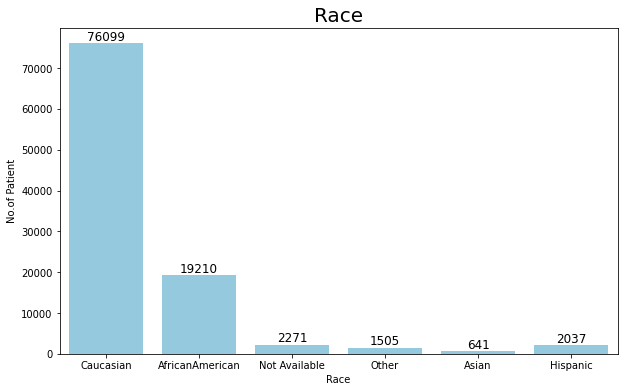

In [ ]:
#'race' column
plt.figure(figsize = (10,6))
plot = sns.countplot(x='race', color = 'skyblue', data=data)
plt.title("Race",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("Race")
plt.ylabel("No.of Patient")
plt.show()

This feature consists of information regarding the patient's race. There are mainly 4 categories: Caucasian, African American, Asian and Hispanic. All others which do not belongs to these categories is grouped into Other and missing value grouped as Not Available.  
Most of the patients belongs to the Caucasian race followed by African American race and very few belongs to Asian race. 

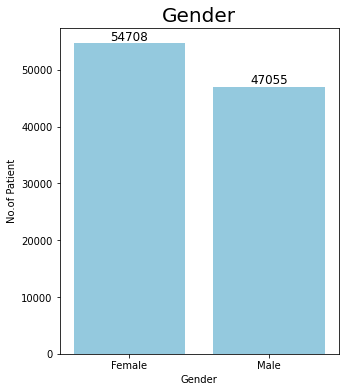

In [ ]:
#'gender' column
plt.figure(figsize = (5,6))
plot = sns.countplot(x='gender',color = 'skyblue' ,data=data)
plt.title("Gender",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("Gender")
plt.ylabel("No.of Patient")
plt.show()

Most of the patients are females.

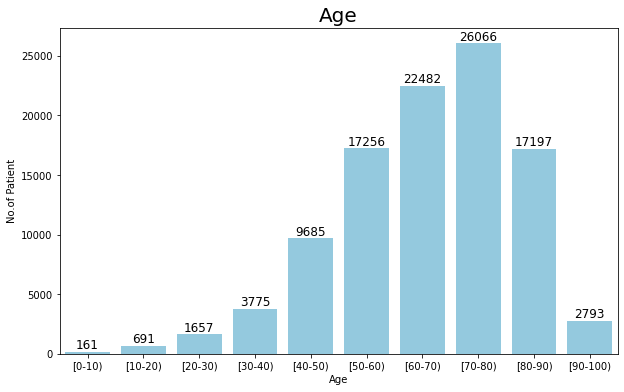

In [ ]:
# 'age' column
plt.figure(figsize = (10,6))
plot = sns.countplot(x='age', color = 'skyblue', data=data)
plt.title("Age",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("Age")
plt.ylabel("No.of Patient")
plt.show()

Age of the patients are grouped into 10 categories, [0-10),[10-20),...,[90-100). We can see that most of the patients are in the age group of 70 to 79 and very few are children in the age group of 0 to 9. The distribution is left skewed, indicating that most of the patients are middle aged or higher.

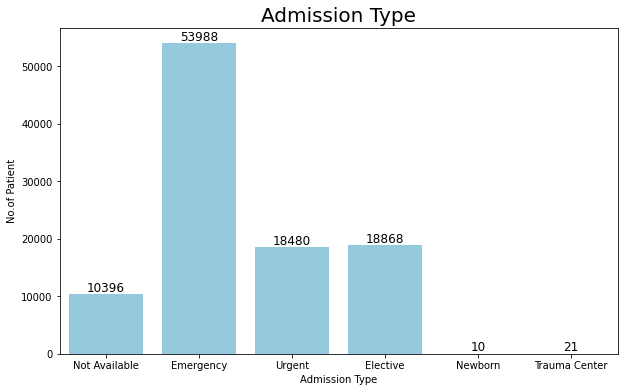

In [ ]:
# Admission Type
plt.figure(figsize = (10,6))
plot = sns.countplot(x='admission_type_id', color = 'skyblue', data=data)
plt.title("Admission Type",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("Admission Type")
plt.ylabel("No.of Patient")
plt.show()

Here we can see the different categories of patient admission to the hospital like Emergency, Elective, Urgent, Trauma Center or New born. Some patients' admission type was missing and are grouped under 'Not Available' category. Most of the patients are admitted as Emergency case and very few are admitted as newborn.

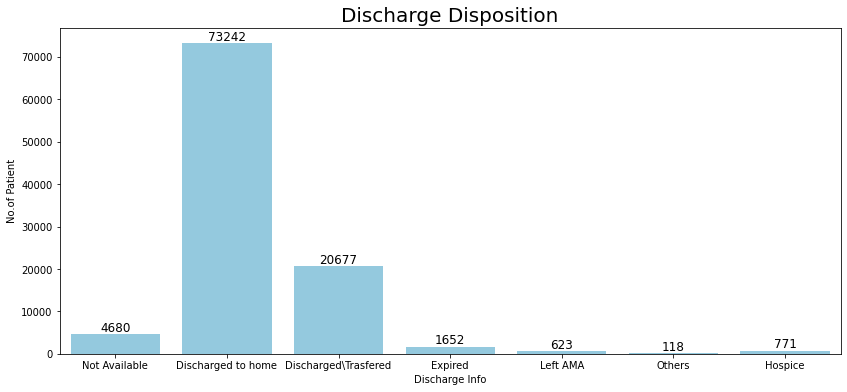

In [ ]:
# Discharge Disposition
plt.figure(figsize = (14,6))
plot = sns.countplot(x='discharge_disposition_id', color = 'skyblue', data=data)
plt.title("Discharge Disposition",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("Discharge Info")
plt.ylabel("No.of Patient")
plt.show()

This field have the information regarding the patients' discharge. We can see that most of the patients discharged and went home. Some of the patients have died.

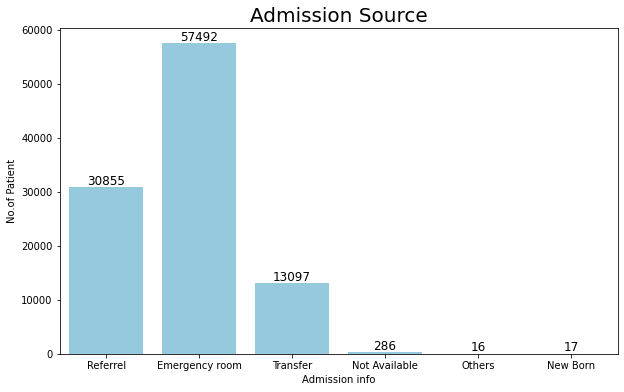

In [ ]:
# Admission Source
plt.figure(figsize = (10,6))
plot = sns.countplot(x='admission_source_id', color = 'skyblue', data=data)
plt.title("Admission Source",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("Admission info")
plt.ylabel("No.of Patient")
plt.show()

Admission Source have the information regarding information like whether a patient admitted by physician referral, emergency room, or transfer from a hospital, etc. The highest frequent cases is from Emergency room. Admission due to newborn issues are low.

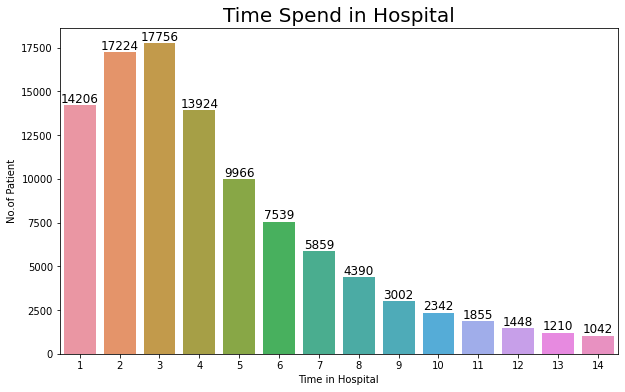

In [ ]:
# Time in hospital
plt.figure(figsize = (10,6))
plot = sns.countplot(x='time_in_hospital',data=data)
plt.title("Time Spend in Hospital",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("Time in Hospital")
plt.ylabel("No.of Patient")
plt.show()

Time in hospital is the number of days between admission and discharge. The maximum number of days a patient was in the hospital is 14 days and minimum number of days was 1. The distribution is right skewed, indicating that very less patients stayed for long.

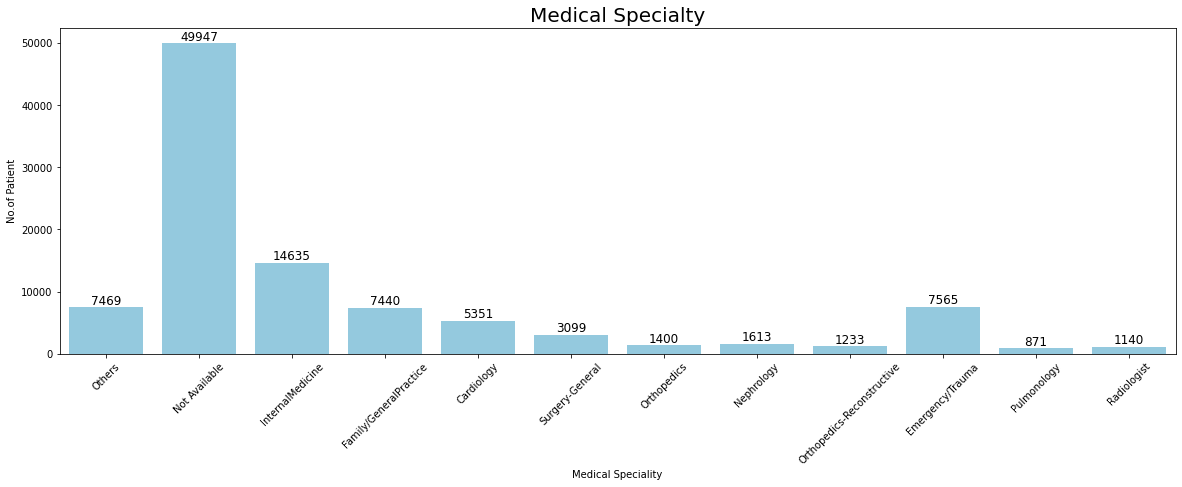

In [ ]:
# Medical Specialty
plt.figure(figsize = (20,6))
plot = sns.countplot(x='medical_specialty', color = 'skyblue', data=data)
plt.title("Medical Specialty",fontsize=20)
plt.xticks(rotation = 45)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("Medical Speciality")
plt.ylabel("No.of Patient")
plt.show()

The Medical Specialty column consist of the details of the medical specialty of the admitting physician. There are 72 different specialty like cardiology, internal medicine, family/general practice, surgeon, etc. We have grouped them into top 10 specialty,Not Available and rest into Others category for easy understanding. 'Not Available' category representing the missing values is having the higher count. Without considering the missing values, the Internal Medicine speciality has the highest number of patients.InternalMedicine the percentage of patient is 14%,for Emergency/Trauma it is 7.4%,for Family/GeneralPractice it is 7.3%

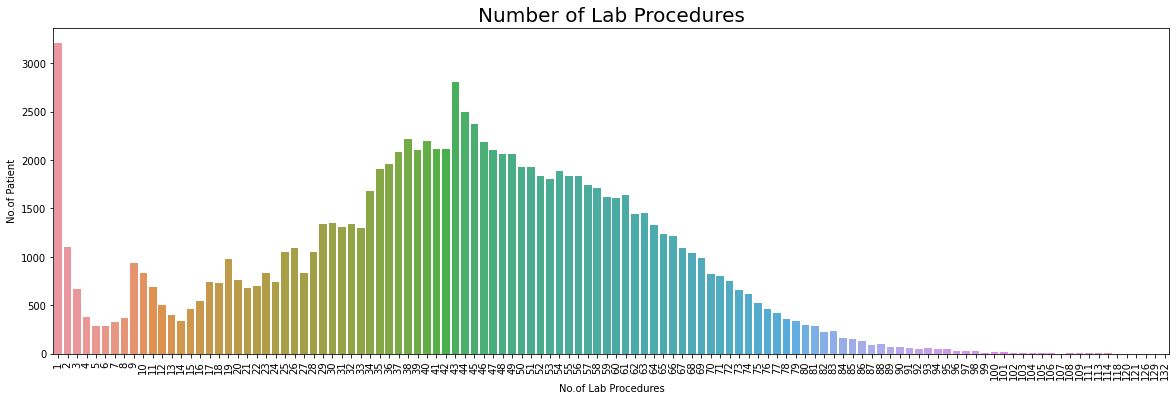

In [ ]:
# Number of lab procedures
plt.figure(figsize = (20,6))
plot = sns.countplot(x='num_lab_procedures',data=data)
plt.title("Number of Lab Procedures",fontsize=20)
plt.xticks(rotation = 90)
plt.xlabel("No.of Lab Procedures")
plt.ylabel("No.of Patient")
plt.show()

This is the number of lab tests performed during the encounter for each patient. Atleast one lab test is conducted for every patient and most frequent number of lab procedures are between 35 - 50. Higher number of lab procedures are taken rarely.

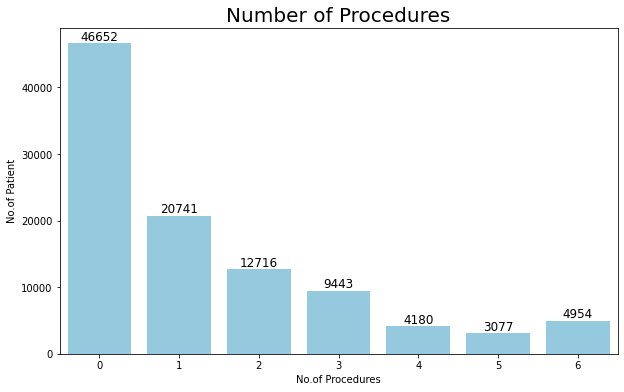

In [ ]:
# Number of procedures
plt.figure(figsize = (10,6))
plot = sns.countplot(x='num_procedures', color = 'skyblue', data=data)
plt.title("Number of Procedures",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("No.of Procedures")
plt.ylabel("No.of Patient")
plt.show()

Here we can find the information about the number of procedures (other than lab tests) performed during the encounter. Most of the patient didn't have medical procedures other than lab tests. This disrtibution also looks like a right skewed one indicating that there are many patients with less number of procedures done.


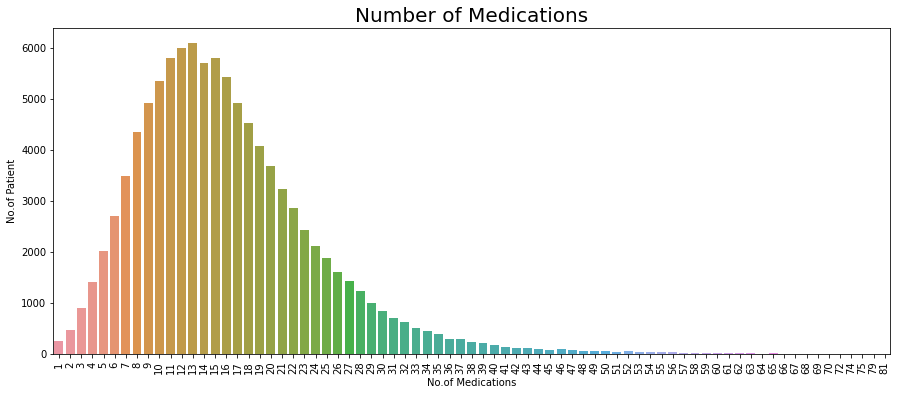

In [ ]:
# Number of Medications
plt.figure(figsize = (15,6))
plot = sns.countplot(x='num_medications',data=data)
plt.title("Number of Medications",fontsize=20)
plt.xticks(rotation = 90)
plt.xlabel("No.of Medications")
plt.ylabel("No.of Patient")
plt.show()

This field indicates the number of distinct generic names(chemical name of a drug) administered during the encounter. The average no.of distinct drugs used is between 9 to 17. Large number of drugs are administered rarely.

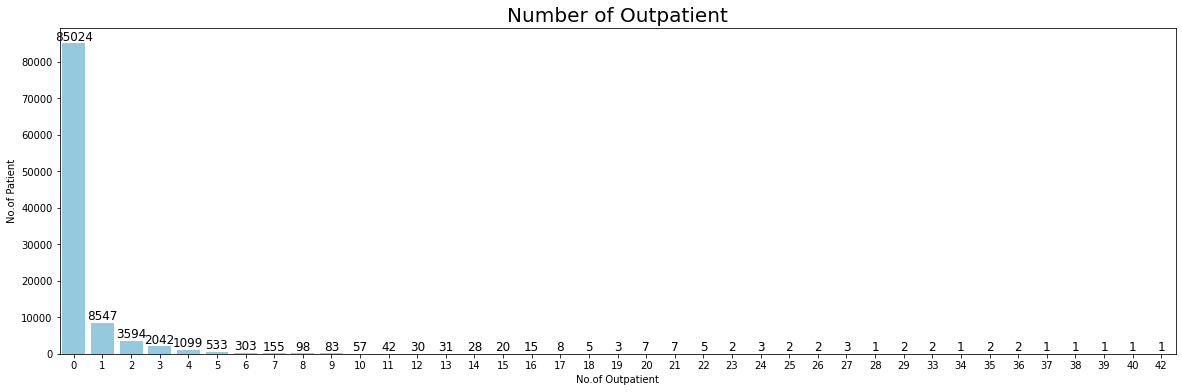

In [ ]:
# Number of Outpatient
plt.figure(figsize = (20,6))
plot = sns.countplot(x='number_outpatient', color = 'skyblue', data=data)
plt.title("Number of Outpatient",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("No.of Outpatient")
plt.ylabel("No.of Patient")
plt.show()

This column indicates the number of outpatient visits of the patient in the year preceding the encounter. We can see, most of the patients did not have outpatient visit before admission.

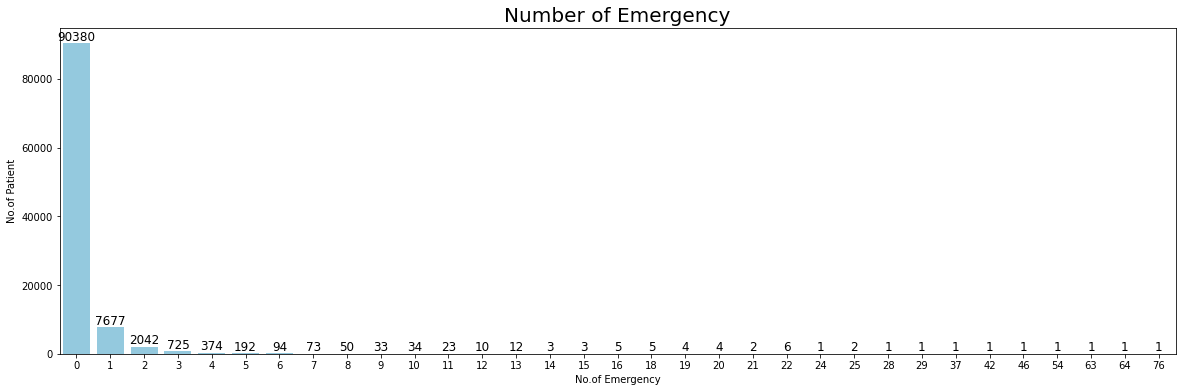

In [ ]:
# Number of emergency visits
plt.figure(figsize = (20,6))
plot = sns.countplot(x='number_emergency', color = 'skyblue', data=data)
plt.title("Number of Emergency",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("No.of Emergency")
plt.ylabel("No.of Patient")
plt.show()

This field indicates the number of emergency visits of the patient in the year preceding the encounter. Most of the patients did not had any emergency visits to the hospital.

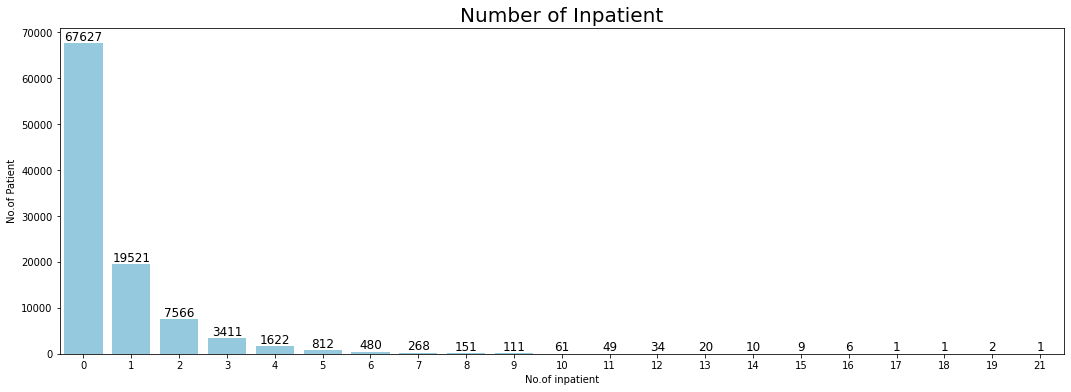

In [ ]:
# Number of inpatient visits
plt.figure(figsize = (18,6))
plot = sns.countplot(x='number_inpatient', color = 'skyblue', data=data)
plt.title("Number of Inpatient",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("No.of inpatient")
plt.ylabel("No.of Patient")
plt.show()

Here we can find the number of inpatient visits of the patient in the year preceding the encounter. And most of the patient don't have any inpatient visits.

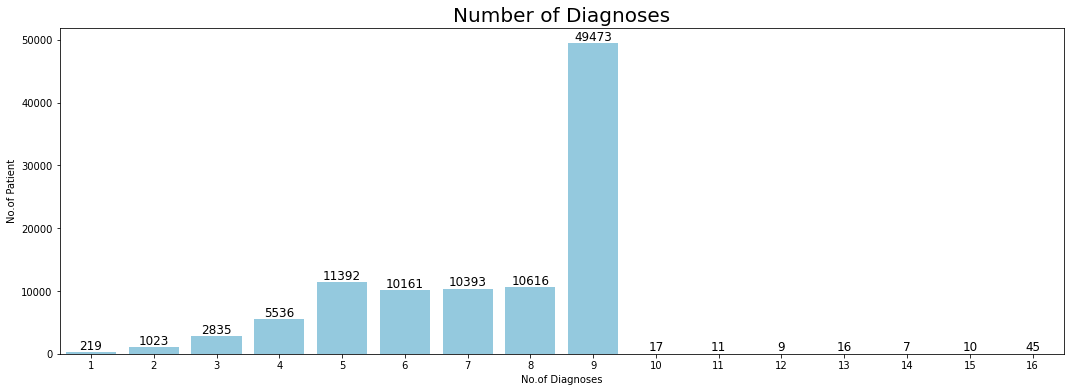

In [ ]:
# Number of diagnoses
plt.figure(figsize = (18,6))
plot = sns.countplot(x='number_diagnoses', color = 'skyblue', data=data)
plt.title("Number of Diagnoses",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("No.of Diagnoses")
plt.ylabel("No.of Patient")
plt.show()

This column indicate the number of diagnoses entered to the system. Most patient have 9 diagnoses per encounter.

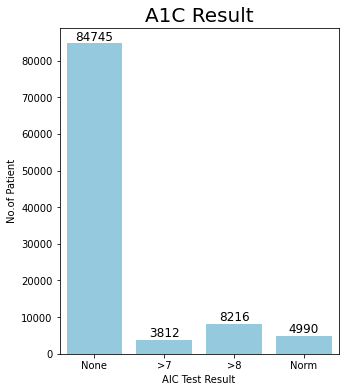

In [ ]:
# A1c test result
plt.figure(figsize = (5,6))
plot = sns.countplot(x='A1Cresult', color = 'skyblue', data=data)
plt.title("A1C Result",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("AIC Test Result")
plt.ylabel("No.of Patient")
plt.show()

A1C test is a common blood test used to diagnose type 1 and type 2 diabetes. This column indicates the range of the result or if the test was not taken. We can see most of the patient not had A1C test and out of the patients who took the test, many had the result greater than 8%.

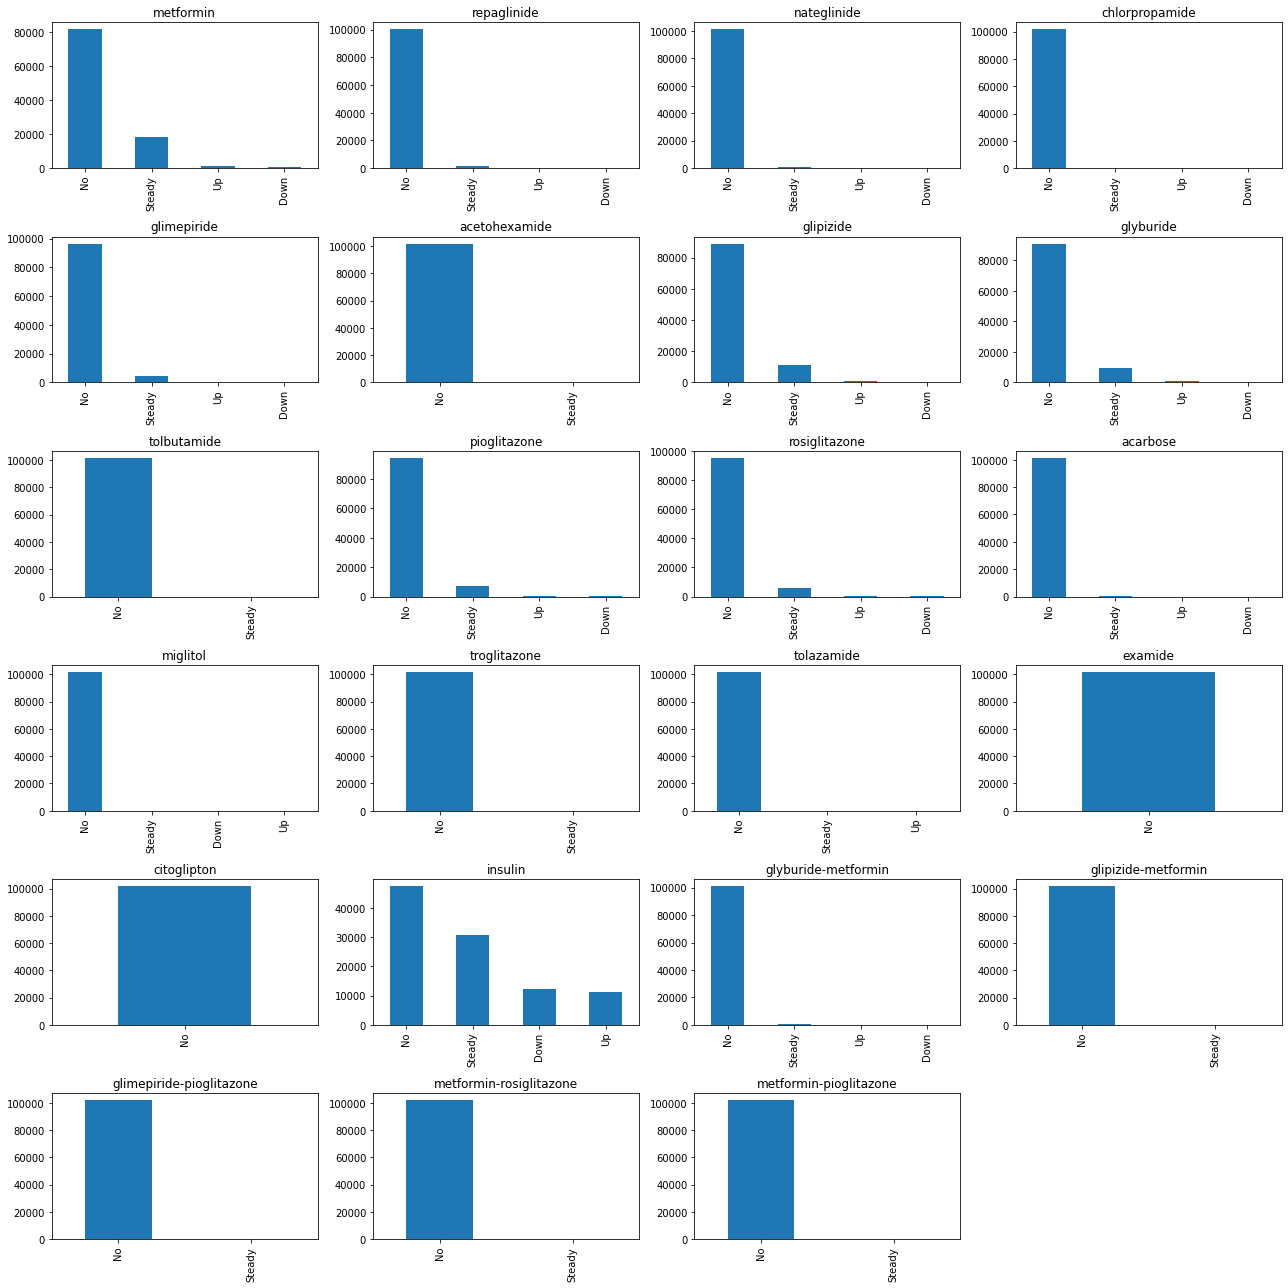

In [ ]:
# Different medications used.
drug_features = data[['metformin', 'repaglinide','nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide','glipizide', 'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide','examide', 'citoglipton', 'insulin', 'glyburide-metformin','glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone', 'metformin-pioglitazone']]
plt.figure(figsize=(18,18))

for i,feature in enumerate(drug_features.columns):
    plt.subplot(6,4,i+1)
    plt.title(feature)
    data[feature].value_counts().plot(kind='bar')
    plt.title(feature,fontsize=12)
    plt.tight_layout()

These are the different types of drugs given to the patient during the encounter. We can see that there are 23 different medications used. The values indicates: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed. We can see that the drugs, examide and citoglipton were never prescribed for the patients and they contain only one feature value in all the rows indicating absence of any predictive power of those two features.

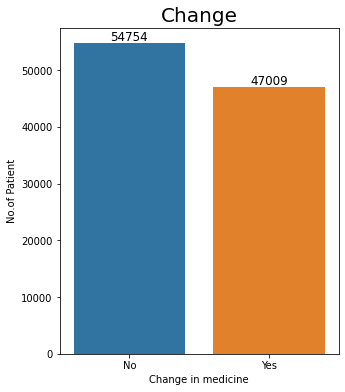

In [ ]:
# Change of medications
plt.figure(figsize = (5,6))
plot = sns.countplot(x='change',data=data)
plt.title("Change",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("Change in medicine")
plt.ylabel("No.of Patient")
plt.show()

Change of medications indicates if there was a change in diabetic medications (either in dosage or generic name). We can see for most of the patient there is no change in diabetic medications.

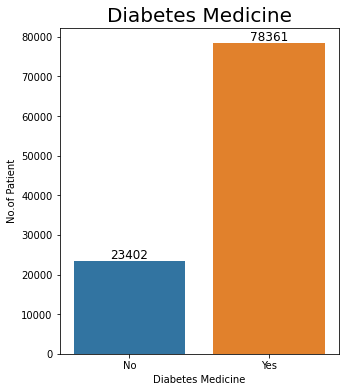

In [ ]:
# Diabetes medications
plt.figure(figsize = (5,6))
plot = sns.countplot(x='diabetesMed',data=data)
plt.title("Diabetes Medicine",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("Diabetes Medicine")
plt.ylabel("No.of Patient")
plt.show()

Diabetes medications indicates if there was any diabetic medication prescribed to a patient. We can see that for most of the patients diabetic medications are prescribed.

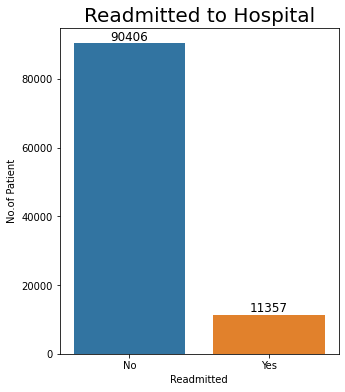

In [ ]:
# Readmitted
plt.figure(figsize = (5,6))
plot = sns.countplot(x='readmitted',data=data)
plt.title("Readmitted to Hospital",fontsize=20)
plt.bar_label(plot.containers[0],fontsize=12)
plt.xlabel("Readmitted")
plt.ylabel("No.of Patient")
plt.show()

This column indicates whether a patient got readmitted to the hospital after discharge. Around 11.16% of patient readmitted to the hospital after discharge.

###Bivariate Analysis

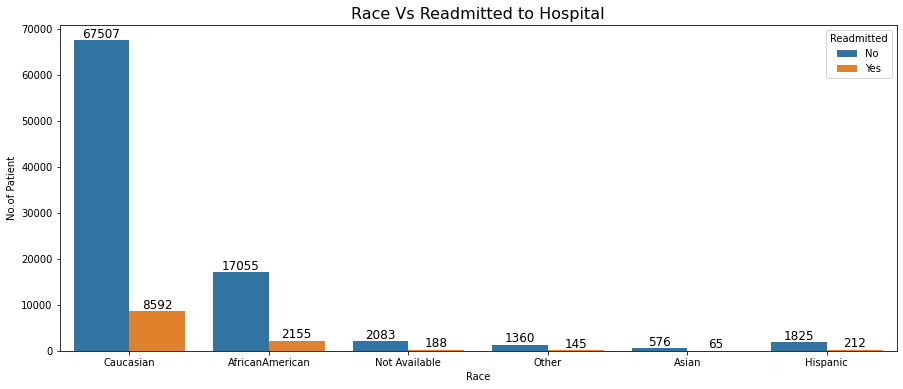

In [ ]:
#race vs readmitted
plt.figure(figsize=(15,6))
plot = sns.countplot(x='race',hue='readmitted',data=data)
plt.title("Race Vs Readmitted to Hospital",fontsize=16)
plt.legend(title='Readmitted', loc='upper right')
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.xlabel("Race")
plt.ylabel("No.of Patient")
plt.show()

Around 74% patients comes under the Caucasian race and in that around 11.29% readmitted to the hospital. If we consider the other categories, African American is 18% of total and around 11.22% readmitted. For Hispanic, is 2% and around 10.41% readmitted. Asian race is only around 0.6% and readmission percentage among them is around 10.14%. In Other category, the patients are around 1.4% and readmission percentage is 9.63%. And for the unknown race categories, they are 2.2% and 8.28% is the readmission percentage.



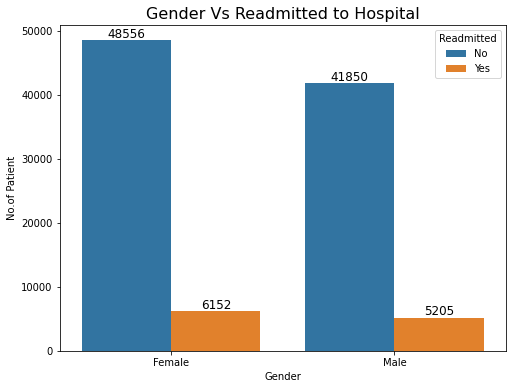

In [ ]:
#gender vs readmitted
plt.figure(figsize=(8,6))
plot = sns.countplot(x='gender',hue='readmitted',data=data)
plt.title("Gender Vs Readmitted to Hospital",fontsize=16)
plt.legend(title='Readmitted', loc='upper right')
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.xlabel("Gender")
plt.ylabel("No.of Patient")
plt.show()

When we consider patients' gender wise information, Female is around 54% and Male around 46%. And when we consider their individual readmission percentage, they are, 11.2% and 11.06% respectively. We can see the readmission rate almost same.

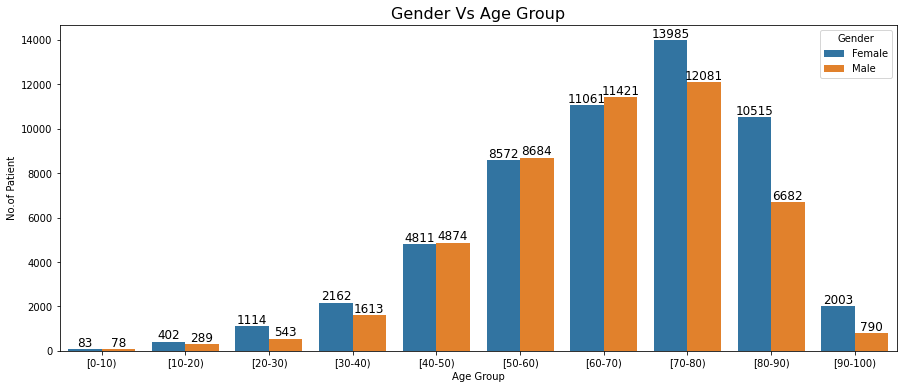

In [ ]:
#gender vs age
plt.figure(figsize=(15,6))
plot = sns.countplot(x='age',hue='gender',data=data)
plt.title("Gender Vs Age Group",fontsize=16)
plt.legend(title='Gender')
plt.xlabel("Age Group")
plt.ylabel("No.of Patient")
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.show()

When we consider the patient information of Gender vs Age, we see that between 0-40 and 70-100 Female patients are higher, and for age 40-70, Male patients are a bit higher than Female.

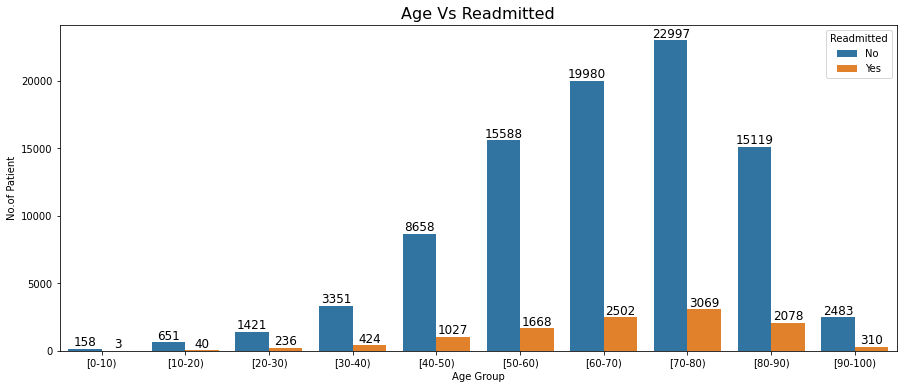

In [ ]:
#age vs readmitted
plt.figure(figsize=(15,6))
plot = sns.countplot(x='age',hue='readmitted',data=data)
plt.title("Age Vs Readmitted",fontsize=16)
plt.legend(title='Readmitted')
plt.xlabel("Age Group")
plt.ylabel("No.of Patient")
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.show()

For all age groups, readmission rate lies between 9.6 to 14% except in [0-10) and [10-20) age groups. Readmission rate is higher in patients with age between 20 to 30

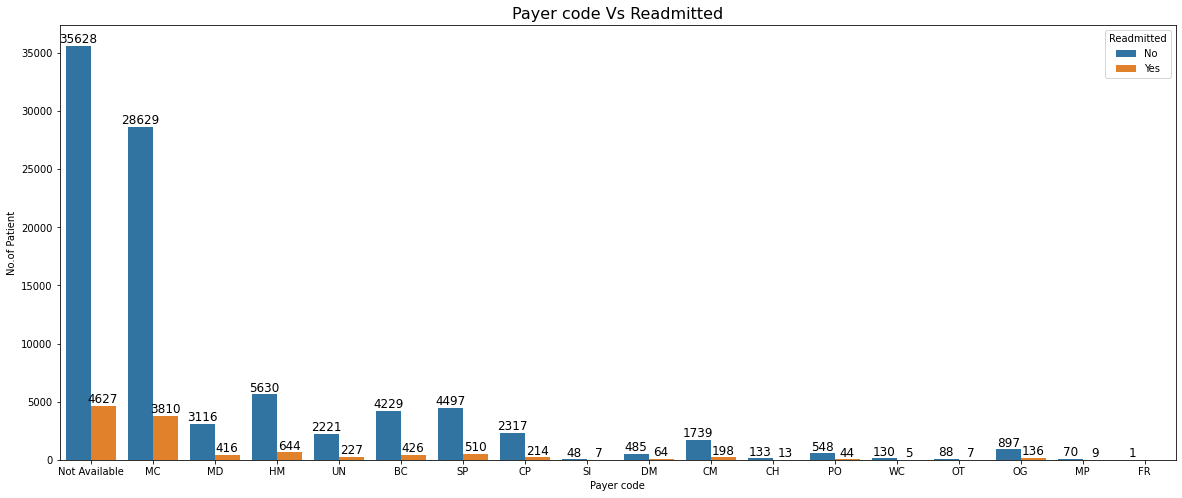

In [ ]:
#payer_code vs readmitted
plt.figure(figsize=(20,8))
plot = sns.countplot(x='payer_code',hue='readmitted',data=data)
plt.title("Payer code Vs Readmitted",fontsize=16)
plt.legend(title='Readmitted', loc='upper right')
plt.xlabel("Payer code")
plt.ylabel("No.of Patient")
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.show()

Highest number of patients with readmitted status comes from those having MC and MD as payer code. Readmission rate is slightly higher(about 11.77%) in patients who have MD as their payer.

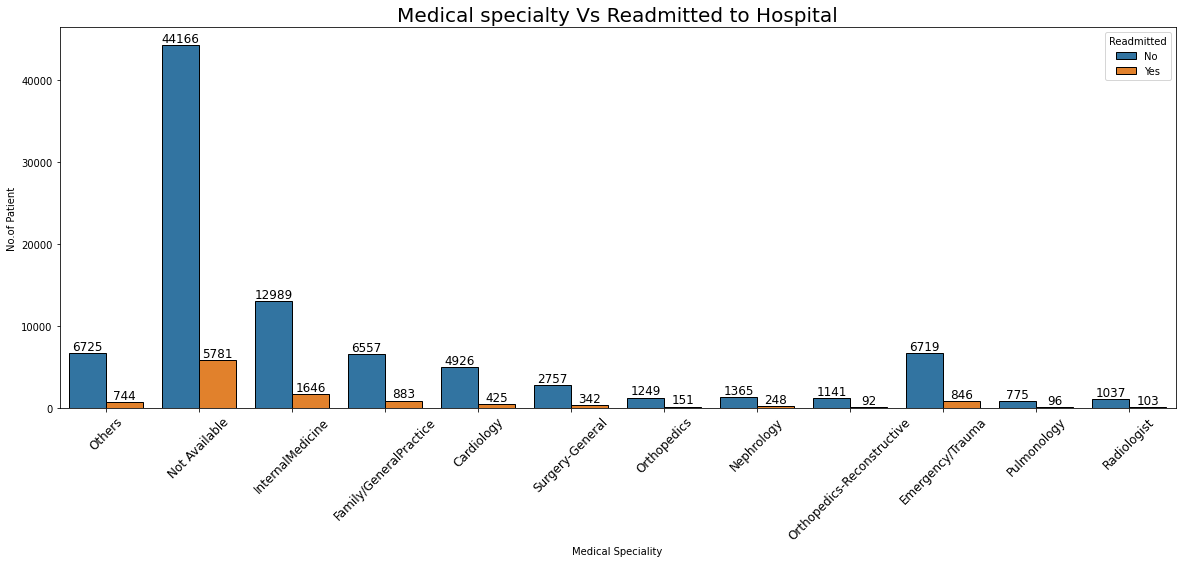

In [ ]:
#medical speciality vs readmitted
plt.figure(figsize=(20,7))
plot = sns.countplot(x='medical_specialty',hue='readmitted',edgecolor="black", data=data)
plt.title("Medical specialty Vs Readmitted to Hospital",fontsize=20)
plt.legend(title='Readmitted', loc='upper right')
plt.xticks(rotation = 45,fontsize=12 )
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.xlabel("Medical Speciality")
plt.ylabel("No.of Patient")
plt.show()

In the medical speciality column, the Not Available category representing the missing values has the higher count. Around 49.08% of medical speciality column data comes under Not Available, however, since this is an important column, we try to give insights on other available categories. InternalMedicine there are 14.38% of total patients and in that 11.2% readmitted. For Family/GeneralPractice its 7.3% and 11.8%, for Emergency/Trauma its 7.4% and 11.18%, for Cardiology its 5.2% and 7.9%, for Surgery-General its 3.0% and 11%, for Nephrology its 1.6% and 15%, for Orthopedics its 1.4% and 34%, for Orthopedics-Reconstructive its 1.2% and 7.4%, for Radiologist its 1.1% and 9% and for Pulmonology its 0.86% and 11.02% respectively. The Others category have 7.34% of patients and readmission percentage is 9.9%.

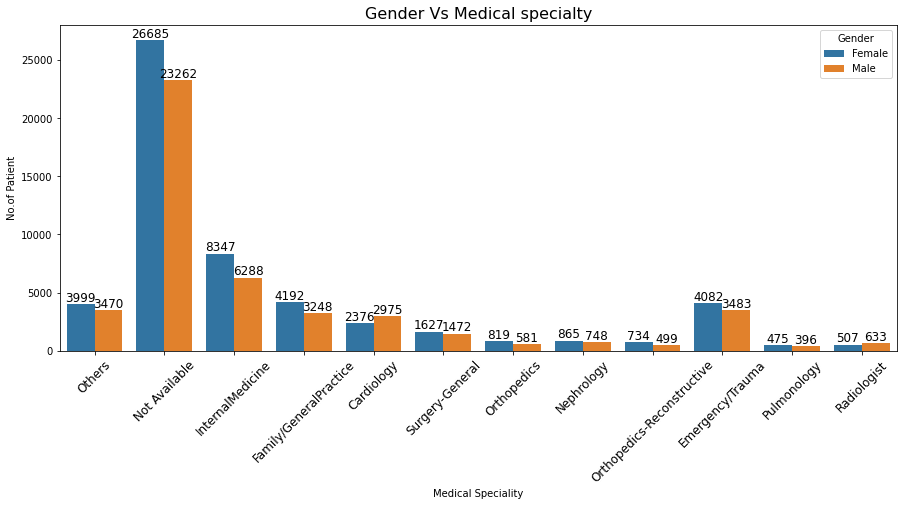

In [ ]:
#gender vs medical speciality
plt.figure(figsize=(15,6))
plot = sns.countplot(x='medical_specialty',hue='gender',data=data)
plt.title("Gender Vs Medical specialty",fontsize=16)
plt.legend(title='Gender')
plt.xlabel("Medical Speciality")
plt.ylabel("No.of Patient")
plt.xticks(rotation = 45,fontsize=12 )
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.show()

We can see that except Cardiology, in all others Female patient percentage is higher. InternalMedicine the percentage of patient is 14%, for Emergency/Trauma is 7.4%, for Family/GeneralPractice is 7.3%

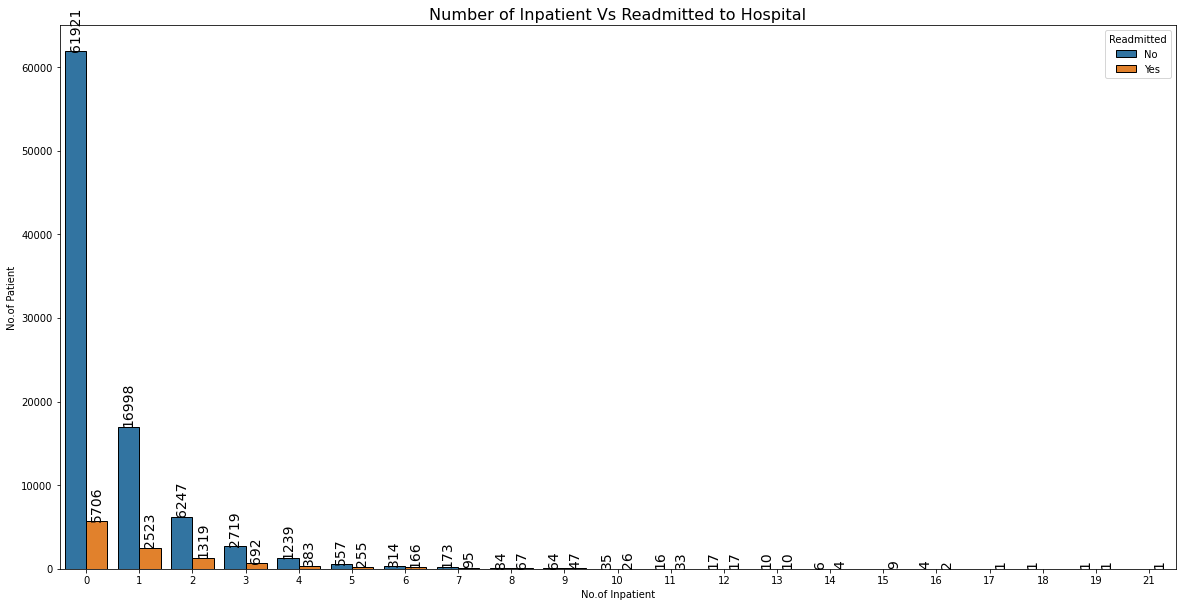

In [ ]:
#number of inpatient vs readmitted
plt.figure(figsize=(20,10))
plot = sns.countplot(x='number_inpatient',hue='readmitted',edgecolor="black", data=data)
plt.title("Number of Inpatient Vs Readmitted to Hospital",fontsize=16)
plt.legend(title='Readmitted', loc='upper right')
plt.bar_label(plot.containers[0],fontsize=14, rotation = 90)
plt.bar_label(plot.containers[1],fontsize=14, rotation = 90)
plt.xlabel("No.of Inpatient")
plt.ylabel("No.of Patient")
plt.show()

As the inpatient visits to the hospital increases, there is an upward trend in percentage of patient readmission.

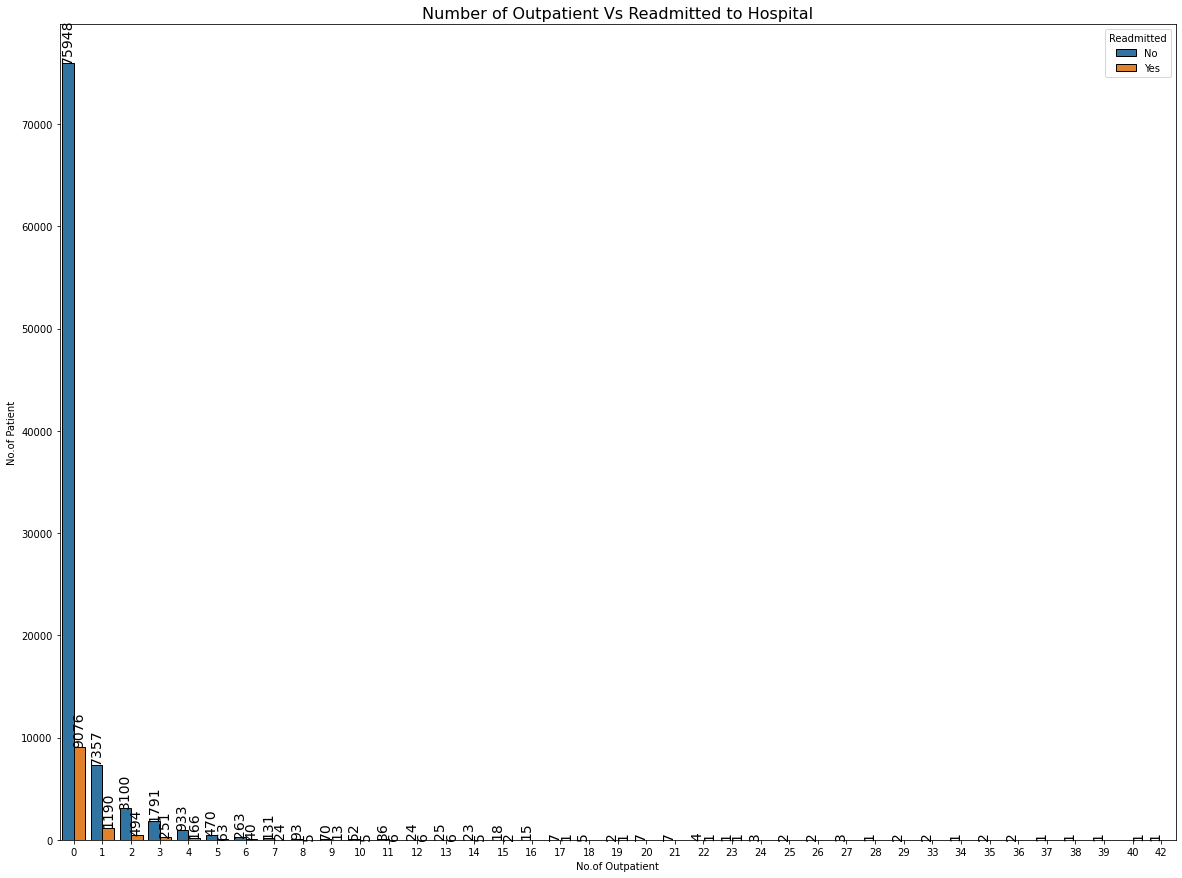

In [ ]:
#number of outpatient vs readmitted
plt.figure(figsize=(20,15))
plot = sns.countplot(x='number_outpatient',hue='readmitted',edgecolor="black", data=data)
plt.title("Number of Outpatient Vs Readmitted to Hospital",fontsize=16)
plt.legend(title='Readmitted', loc='upper right')
plt.bar_label(plot.containers[0],fontsize=14, rotation = 90 )
plt.bar_label(plot.containers[1],fontsize=14, rotation = 90)
plt.xlabel("No.of Outpatient")
plt.ylabel("No.of Patient")
plt.show()

These is no describable trend can be observed for number of outpatient visit and readmission.

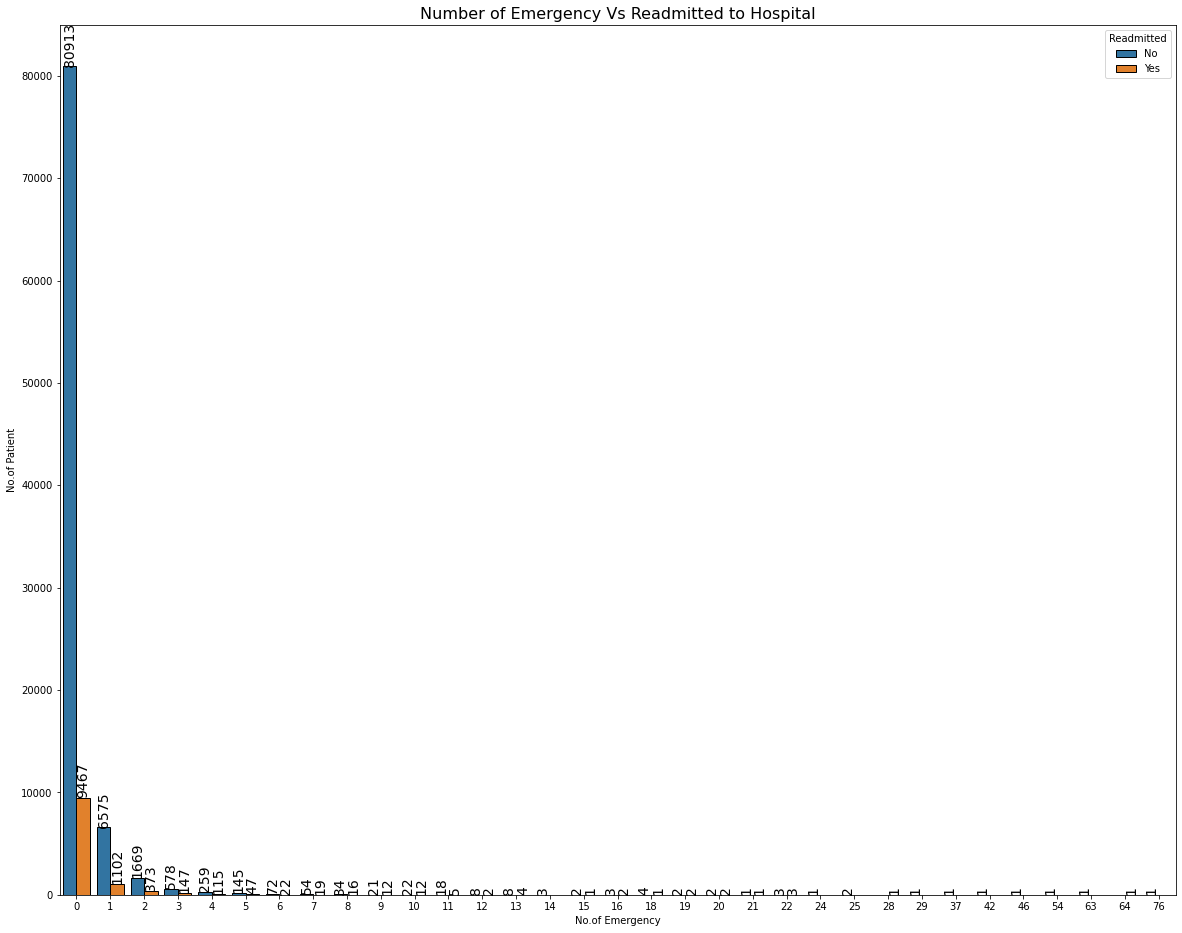

In [ ]:
#emergency vs readmitted
plt.figure(figsize=(20,16))
plot = sns.countplot(x='number_emergency',hue='readmitted',edgecolor="black", data=data)
plt.title("Number of Emergency Vs Readmitted to Hospital",fontsize=16)
plt.legend(title='Readmitted', loc='upper right')
plt.bar_label(plot.containers[0],fontsize=14, rotation = 90)
plt.bar_label(plot.containers[1],fontsize=14, rotation = 90)
plt.xlabel("No.of Emergency")
plt.ylabel("No.of Patient")
plt.show()

Same as Outpatient visit, there is no observed trend between number of emergency visit and readmission.

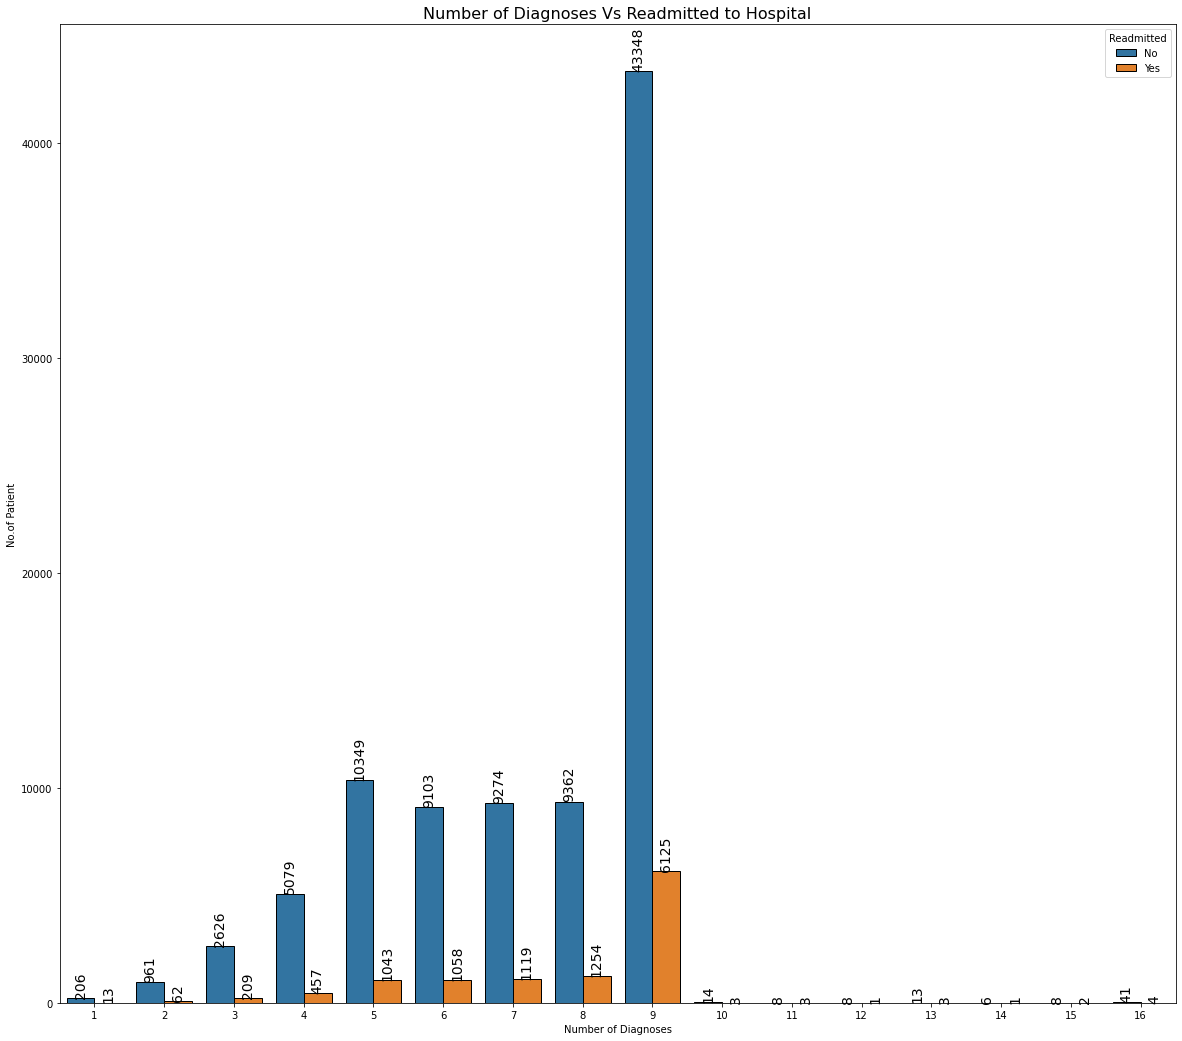

In [ ]:
#number of diagnoses vs readmitted
plt.figure(figsize=(20,18))
plot = sns.countplot(x='number_diagnoses',hue='readmitted',edgecolor="black", data=data)
plt.title("Number of Diagnoses Vs Readmitted to Hospital",fontsize=16)
plt.legend(title='Readmitted', loc='upper right')
plt.bar_label(plot.containers[0],fontsize=14, rotation = 90)
plt.bar_label(plot.containers[1],fontsize=14, rotation = 90)
plt.xlabel("Number of Diagnoses")
plt.ylabel("No.of Patient")
plt.show()

When we consider the percentage of patient readmission, if the no.of diagnoses is 10/11/13/15 there is a slight higher chance of patient readmission. And amoung them the highest percentage is when no.of diagnoses is 11.

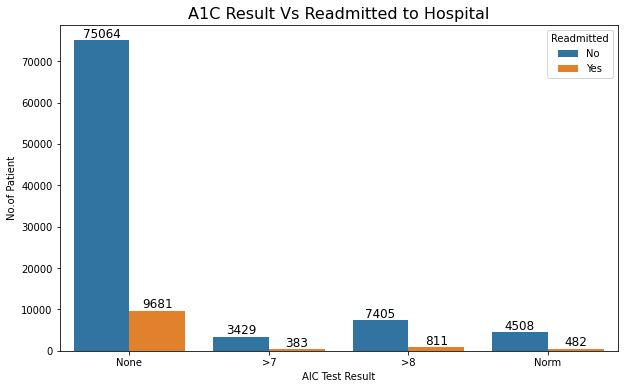

In [ ]:
#A1Cresult vs readmitted
plt.figure(figsize=(10,6))
plot = sns.countplot(x='A1Cresult',hue='readmitted',data=data)
plt.title("A1C Result Vs Readmitted to Hospital",fontsize=16)
plt.legend(title='Readmitted', loc='upper right')
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.xlabel("AIC Test Result")
plt.ylabel("No.of Patient")
plt.show()

A1C levels are a strong indicator of Glucose in the body. From the graph most of the patient not had any A1C test. And the readmission rate is less with respect to results.

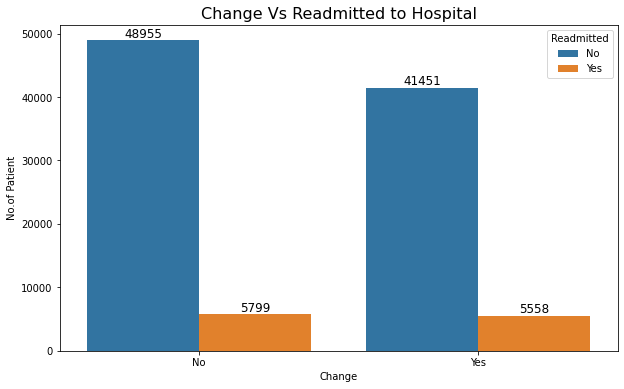

In [ ]:
#change vs readmitted
plt.figure(figsize=(10,6))
plot = sns.countplot(x='change',hue='readmitted',data=data)
plt.title("Change Vs Readmitted to Hospital",fontsize=16)
plt.legend(title='Readmitted', loc='upper right')
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.xlabel("Change")
plt.ylabel("No.of Patient")
plt.show()

Change in medication does not have any direct impact on readmission rate. For 54% of patient, there is no change in medication and readmission chance is 10.5%. For the patient who had some change in the medication, the readmission chance is a little higher, 11.82%.

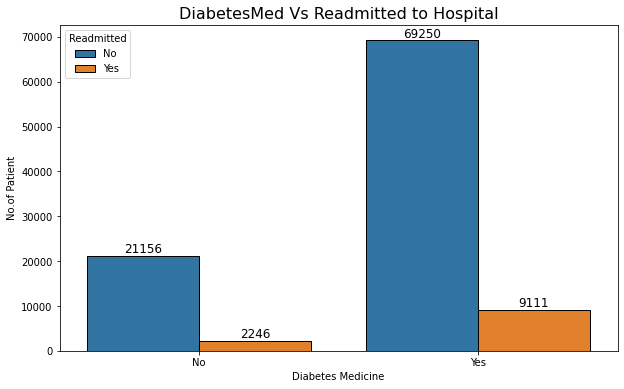

In [ ]:
#diabetesmed vs readmitted
plt.figure(figsize=(10,6))
plot = sns.countplot(x='diabetesMed',hue='readmitted',edgecolor="black", data=data)
plt.title("DiabetesMed Vs Readmitted to Hospital",fontsize=16)
plt.legend(title='Readmitted', loc='upper left')
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.xlabel("Diabetes Medicine")
plt.ylabel("No.of Patient")
plt.show()

We see that most of the patient(77%) had DiabetesMed. And when we consider it with respect to readmission, we see that, for the patients with no DiabetesMed, the readmission percentage is 9.6% and for DiabetesMed it is bit higher, 11.63%.

**Finding the relation between the input and target variable**

In [ ]:
# Finding the correlation between the input and target variable
# Chi-square test for identifying categorical features which are having significant relation with the target column 'readmitted'
from scipy.stats import chi2_contingency
#extracting the names of all categorical columns except the target column
categorical_features = data.select_dtypes(include=['object']).columns.difference(['readmitted'])
print("Features that are having significant relation with the target column 'readmitted':")
for feature in categorical_features:
    crosstabres = pd.crosstab(index=data[feature],columns=data['readmitted'])
    res =chi2_contingency(crosstabres)
# Setting alpha value as 0.01   
    if res[1] < 0.01:
        print(feature,end=", ")

Features that are having significant relation with the target column 'readmitted':
A1Cresult, admission_source_id, admission_type_id, age, change, diabetesMed, diag_1, diag_2, diag_3, discharge_disposition_id, glipizide, insulin, max_glu_serum, medical_specialty, metformin, payer_code, race, repaglinide, 

In [ ]:
# Plotting a Correlation heat map to find the relation between numerical features with the target
#Changing the target column from categorical to numerical to find the relation

data['readmitted'] = data['readmitted'].replace(['No','Yes'], [0,1]).astype('int64')


In [ ]:
data['readmitted'].value_counts()

0    90406
1    11357
Name: readmitted, dtype: int64

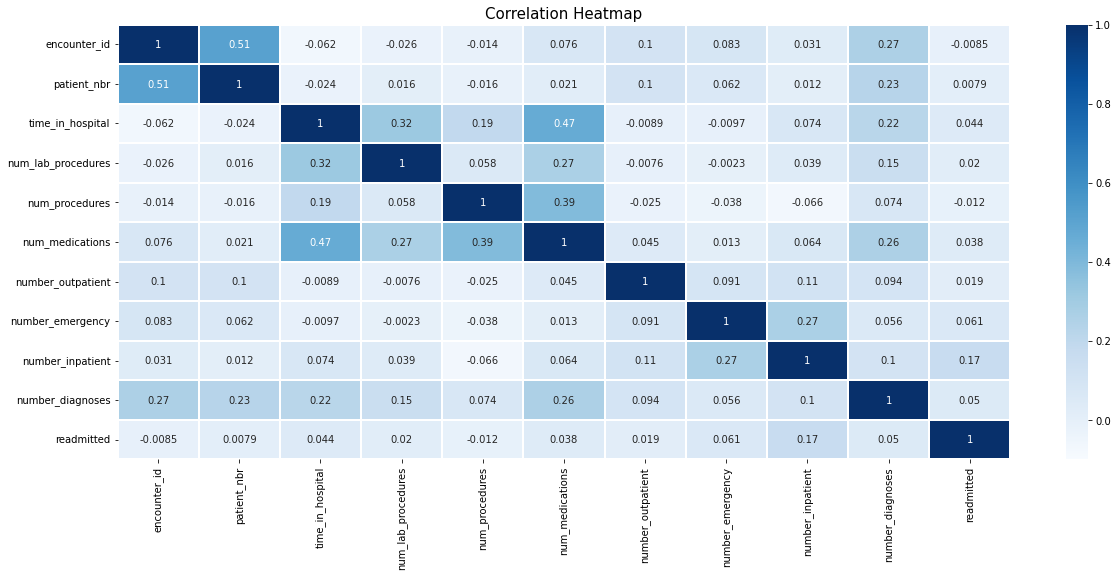

In [ ]:
#heatmap
plt.subplots(figsize=(20,8))
sns.heatmap(data.corr() , vmin = -0.1, vmax = 1, annot = True, linewidth = .2, cmap='Blues')
plt.title('Correlation Heatmap',fontsize =15)
plt.show()

This heatmap shows the correlation matrix of numerical features with the target column. We can see that 'number_inpatient' is having a better correlation with target and the column num_procedures got least. We can also see that except 'encounter_id' and 'num_procedures', all other numerical columns are having a positive correlation with the target column 'readmitted'.

## Preprocessing(stage 2)

Refining data by removing un-wanted rows

The patients whose discharge status is given 'Expired' can be removed from the dataset.

In [ ]:
#droping patients with discharge_disposition_id as 'Expired'
expired_patients = data[data['discharge_disposition_id'] == 'Expired'].index
data.drop(expired_patients,axis=0,inplace=True)

We will now try to reduce the 'Not Available' values from our dataset. 'Not Available' represents nan, Not Available, Not Mapped, or null values. Hence by reducing the 'Not Available', we are actually trying to reduce the missing values and thus refining the dataset.

In [ ]:
#list of columns containing 'Not Available' values
na_columns = []
for f in data.columns:
    if data[data[f]=="Not Available"].any().sum()>0 :
        na_columns.append(f) 
na_columns

['race',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3']

These are the columns which got 'Not Available' value, now we will check how many 'Not Available' value present in each rows

In [ ]:
#getting the row-wise count of 'Not Available' values
na_rowcount = data[na_columns].isin(['Not Available']).sum(axis=1)
na_rowcount.value_counts()

1    47866
0    25569
2    20325
3     5988
4      340
5       23
dtype: int64

In [ ]:
#droping the rows containing more than Four 'Not Available' values
na_row_index = data[na_rowcount>4].index
data.drop(na_row_index,axis=0,inplace=True)

In [ ]:
#checking for any duplicate entries
print('Total no.of entries:',data.shape[0])
print ('No.of Patient Unique ID:',data['patient_nbr'].nunique())

Total no.of entries: 100088
No.of Patient Unique ID: 70418


We see that 'patient_nbr' got some duplicate values. Since, 'patient_nbr' column has the unique patient ID, we can cosider there are duplicate entries for same patient and hence, we can remove those duplicate entries.

In [ ]:
data.drop_duplicates(subset=['patient_nbr'], keep='first', inplace=True)

##### Feature Reduction

Feature reduction is the process of reducing the number of features by removing unwanted columns.

Since the columns 'patient_nbr' and 'encounter_id' are just identifiers and does not contribute to the prediction, we can drop these two variables from our dataset.

In [ ]:
#droping patient_nbr and encounter_id
data.drop(['patient_nbr','encounter_id'],axis=1,inplace=True)

From our EDA we have found that the medication features 'examide' and 'citoglipton' does not have any predictive power since they contain only a single value for the entire rows. So, we are gonna drop these two features also.

In [ ]:
#droping 'citoglipton' and 'examide'
data.drop(['citoglipton','examide'],axis=1,inplace=True)

In [ ]:
data.shape

(70418, 45)

Original dataset has 101766 rows and 50 columns. After feature reduction and refining the dataset, the dataset has 70418 rows and 45 columns.

### Outlier Detection

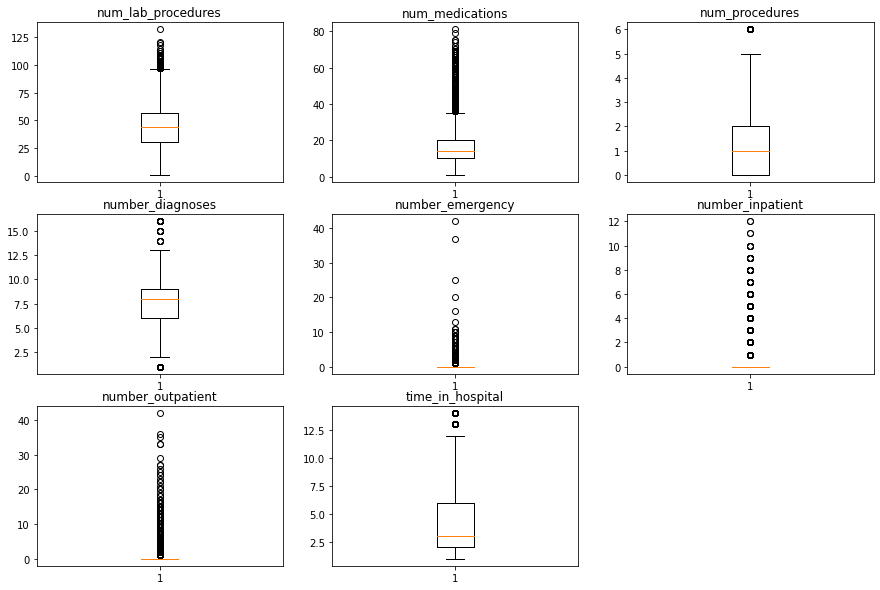

In [ ]:
num_columns = data.select_dtypes(include=['int64']).columns.difference(['readmitted'])
plt.figure(figsize=(15,10))
for i,feature in enumerate(num_columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(data[feature])
    plt.title(feature)


We can find that there are few outliers detected in features, however, from the EDA and understaing the dataset, we understood that there is no data entry error and all the data are relevant. So, we don't consider them as outliers and hence not performing any outlier handling.

### Feature Engineering

We will introduce a new feature ‘num_change’ which will contain the count of how many medication changes were made in total for each patient. The new feature indicate for each patient, how many medication changes have been observed. The value 1 for Up / Down feature values and 0 for No / Steady feature values.

In [ ]:
#list of 21 medication features
medications = ['metformin','repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 
       'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 
       'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']
for col in medications:
    colname = col + 'temp'
    data[colname] = data[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
#calculating the number of medication changes made for each patient
data['num_change'] = 0
for col in medications:
    colname = col + 'temp'
    data['num_change'] += data[colname]
    del data[colname]
data['num_change'].value_counts()

0    53062
1    16353
2      926
3       74
4        3
Name: num_change, dtype: int64

For 53062 patients these 21 medications were not prescribed or there was no change in medications. There was a change in 1 medication for 16353 patients. 

The total number of medications used by a patient indicates the severity of their condition. So, we will count the number of medications for each patient record in the form of a new feature ‘nummed’. Steady, Up and Down feature values are coded as 1 and No as 0 for taking the count across every patient record.

In [ ]:
for col in medications:
    data[col] = data[col].apply(lambda x: 0 if x == 'No' else 1)
data['nummed'] = 0
for col in medications:
    data['nummed'] += data[col]
    data.drop(col,axis=1,inplace=True)
data['nummed'].value_counts()

1    31359
0    16823
2    15500
3     5678
4     1004
5       50
6        4
Name: nummed, dtype: int64

16823 patients were on No medication, 31359 patients were on 1 medication and so on.

Age column represented as intervals groups and so we can consider the midpoint of the interval as the average patient age.

In [ ]:
data['age'] = data.age.replace(['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'],[5,15,25,35,45,55,65,75,85,95]).astype('int64')

In [ ]:
data['change'] = data.change.replace(['Yes','No'],[1,0]).astype('int64')

In [ ]:
data['diabetesMed'] = data.diabetesMed.replace(['Yes','No'],[1,0]).astype('int64')

### Encoding

We use one-hot encoding technique for encoding categorical features.


In [ ]:
#one-hot encoding categorical columns
data_encoded = pd.get_dummies(data,drop_first=True)

In [ ]:
#standard scaling numerical features
from sklearn.preprocessing import StandardScaler
standard_scale = StandardScaler()
num_col = data_encoded.select_dtypes(include=['int64']).columns.difference(['readmitted'])
for feature in num_col:
    scale = standard_scale.fit(data_encoded[[feature]])
    data_encoded[feature] = scale.transform(data_encoded[[feature]])

In [ ]:
np.round(data_encoded.describe(),5)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,num_change,nummed,race_Asian,race_Caucasian,race_Hispanic,race_Not Available,race_Other,gender_Male,admission_type_id_Emergency,admission_type_id_Newborn,admission_type_id_Not Available,admission_type_id_Trauma Center,admission_type_id_Urgent,discharge_disposition_id_Discharged\Trasfered,discharge_disposition_id_Hospice,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Others,admission_source_id_New Born,admission_source_id_Not Available,admission_source_id_Others,admission_source_id_Referrel,admission_source_id_Transfer,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_Not Available,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Not Available,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Others,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Surgery-General,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Not Available,diag_1_Other,diag_1_Respiratory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Not Available,diag_2_Other,diag_2_Respiratory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Not Available,diag_3_Other,diag_3_Respiratory,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm
count,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000,70418.00000
mean,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.08939,-0.00000,0.00000,0.00697,0.74779,0.02139,0.02718,0.01647,0.46806,0.50794,0.00013,0.11258,0.00026,0.18264,0.19268,0.00655,0.00581,0.04594,0.00097,0.00011,0.00352,0.00016,0.32506,0.13776,0.00163,0.01866,0.02776,0.00530,0.00001,0.05678,0.28417,0.03090,0.00045,0.43358,0.00924,0.00091,0.00649,0.00053,0.04698,0.02647,0.00166,0.06257,0.07117,0.15203,0.01136,0.48177,0.01605,0.01478,0.07820,0.00907,0.01173,0.03134,0.08167,0.09249,0.04938,0.06679,0.05781,0.15921,0.00016,0.05136,0.13585,0.13789,0.04079,0.07643,0.02592,0.01840,0.19903,0.00398,0.08315,0.09928,0.17858,0.03857,0.05817,0.02008,0.01948,0.19646,0.01718,0.10690,0.06682,0.01024,0.95199,0.02437,0.08866,0.81721,0.05335
std,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,0.28531,1.00001,1.00001,0

In [ ]:
data_encoded.shape

(70418, 96)

In [ ]:
#splitting the data into feature matrix and target vector
X = data_encoded.drop(['readmitted'], axis = 1)
y = data_encoded['readmitted']

In [ ]:
print(X.shape)
print(y.shape)

(70418, 95)
(70418,)


In [ ]:
#splitting the training data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56334, 95)
(56334,)
(14084, 95)
(14084,)


# Model Selection

Logistic Regression

In [ ]:


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
#creating an instance of the logistic regression model
logistic_model = LogisticRegression(max_iter=500)
#training the model
logistic_model.fit(X_train,y_train)
#testing the model
y_pred = logistic_model.predict(X_test)

#measuring performance
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy is: 0.9111047997727918
Confusion Matrix:
 [[12829     4]
 [ 1248     3]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12833
           1       0.43      0.00      0.00      1251

    accuracy                           0.91     14084
   macro avg       0.67      0.50      0.48     14084
weighted avg       0.87      0.91      0.87     14084



K-Nearest Neighbors(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5,weights='distance')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
    
#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.906
Confusion Matrix:
 [[12739    94]
 [ 1231    20]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     12833
           1       0.18      0.02      0.03      1251

    accuracy                           0.91     14084
   macro avg       0.54      0.50      0.49     14084
weighted avg       0.85      0.91      0.87     14084



Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
#implementing Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)
y_pred = nb_classifier.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.134
Confusion Matrix:
 [[  675 12158]
 [   36  1215]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.05      0.10     12833
           1       0.09      0.97      0.17      1251

    accuracy                           0.13     14084
   macro avg       0.52      0.51      0.13     14084
weighted avg       0.87      0.13      0.11     14084



Decision Tree Classifier¶

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
#training the model
dt_model.fit(X_train,y_train)
#testing the model
y_pred = dt_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.828
Confusion Matrix:
 [[11477  1356]
 [ 1060   191]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     12833
           1       0.12      0.15      0.14      1251

    accuracy                           0.83     14084
   macro avg       0.52      0.52      0.52     14084
weighted avg       0.85      0.83      0.84     14084



Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.911
Confusion Matrix:
 [[12832     1]
 [ 1251     0]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12833
           1       0.00      0.00      0.00      1251

    accuracy                           0.91     14084
   macro avg       0.46      0.50      0.48     14084
weighted avg       0.83      0.91      0.87     14084



Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(random_state=0)
gbc_model.fit(X_train, y_train)
y_pred = gbc_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.911
Confusion Matrix:
 [[12828     5]
 [ 1249     2]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12833
           1       0.29      0.00      0.00      1251

    accuracy                           0.91     14084
   macro avg       0.60      0.50      0.48     14084
weighted avg       0.86      0.91      0.87     14084



Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc_model = BaggingClassifier(base_estimator=RandomForestClassifier(),random_state=0)
bc_model.fit(X_train, y_train)
y_pred = bc_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.911
Confusion Matrix:
 [[12833     0]
 [ 1251     0]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12833
           1       0.00      0.00      0.00      1251

    accuracy                           0.91     14084
   macro avg       0.46      0.50      0.48     14084
weighted avg       0.83      0.91      0.87     14084



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature Importance (Random Forest)

In [ ]:
Feat_Import = pd.DataFrame(rf_model.feature_importances_ , index =X.columns, columns = [ 'Feature Importance']).sort_values(by='Feature Importance',ascending=False)*100
Feat_Import

,Feature Importance
num_lab_procedures,9.818598
num_medications,8.722471
time_in_hospital,6.263484
age,4.868377
num_procedures,4.556729
...,...
admission_source_id_Others,0.007571
diag_1_Not Available,0.006837
admission_type_id_Trauma Center,0.001391
admission_source_id_New Born,0.000573


In [ ]:
Feat_Import[Feat_Import['Feature Importance']>1]

,Feature Importance
num_lab_procedures,9.818598
num_medications,8.722471
time_in_hospital,6.263484
age,4.868377
num_procedures,4.556729
number_diagnoses,4.166414
nummed,2.864814
gender_Male,2.253703
number_inpatient,2.203257
number_outpatient,1.963979


In [ ]:
lis = Feat_Import[Feat_Import['Feature Importance']<1].index
X2 = X
for i in lis:
    X2.drop([i],axis = 1,inplace = True)
    
X2.shape    

(70418, 30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state = 42, test_size = 0.2)

In [ ]:
rf2 = RandomForestClassifier()
rf2.fit(X_train,y_train)
y_pred2 = rf2.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred2,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred2))

Accuracy score =0.911
Confusion Matrix:
 [[12833     0]
 [ 1251     0]]


In [ ]:
confusion_matrix(y_test, y_pred2)

array([[12833,     0],
       [ 1251,     0]])

##### Synthetic Minority Oversampling Technique(SMOTE)

In [ ]:
y.value_counts()

0    64123
1     6295
Name: readmitted, dtype: int64

There is a class imbalance in our dataset.  
When observation in one class is higher than the observation in other classes then there exists a class imbalance. Class Imbalance is a common problem in machine learning. Imbalanced data can hamper our model accuracy. Most machine learning algorithms work best when the number of samples in each class are about equal. If the data set is imbalanced then we will get a pretty high accuracy just by predicting the majority class, but we will fail to capture the minority class, which is most often the point of creating the model in the first place.
There are many techniques to handle imbalanced data. Some of these are:  
* Random Under-sampling  
* Random Over-sampling  
* Random Under-sampling with imblearn  
* Random Over-sampling with imblearn  
* Under-sampling: Tomek links  
* Synthetic Minority Oversampling Technique(SMOTE)  
* NearMiss  

These all techniques have their own pros and cons. We are going to use SMOTE technique which generates synthetic data for the minority class. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors. This process is continued until the data become balanced.

In [ ]:
#applying SMOTE on the imbalanced dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
#fit predictor and target variables
X_smote,y_smote = smote.fit_resample(X,y)

print("Original dataset shape:",Counter(y))
print("Resampled dataset shape:",Counter(y_smote))

Original dataset shape: Counter({0: 64123, 1: 6295})
Resampled dataset shape: Counter({0: 64123, 1: 64123})


In [ ]:
y_smote.value_counts()

0    64123
1    64123
Name: readmitted, dtype: int64

In [ ]:
#splitting the balanced dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state=42, test_size=0.2)

 Logistic regression

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
#creating an instance of the logistic regression model
logistic_model = LogisticRegression(max_iter=500)
#training the model
logistic_model.fit(X_train,y_train)
#testing the model
y_pred = logistic_model.predict(X_test)

#measuring performance
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy is: 0.7041715399610137
Confusion Matrix:
 [[8873 4110]
 [3478 9189]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70     12983
           1       0.69      0.73      0.71     12667

    accuracy                           0.70     25650
   macro avg       0.70      0.70      0.70     25650
weighted avg       0.70      0.70      0.70     25650



K-Nearest Neighbors(KNN)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5,weights='distance')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
    
#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.800
Confusion Matrix:
 [[ 7902  5081]
 [   51 12616]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.61      0.75     12983
           1       0.71      1.00      0.83     12667

    accuracy                           0.80     25650
   macro avg       0.85      0.80      0.79     25650
weighted avg       0.85      0.80      0.79     25650



Naive Bayes Classifier

In [ ]:
#implementing Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)
y_pred = nb_classifier.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.683
Confusion Matrix:
 [[8481 4502]
 [3637 9030]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.65      0.68     12983
           1       0.67      0.71      0.69     12667

    accuracy                           0.68     25650
   macro avg       0.68      0.68      0.68     25650
weighted avg       0.68      0.68      0.68     25650



Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
#training the model
dt_model.fit(X_train,y_train)
#testing the model
y_pred = dt_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.894
Confusion Matrix:
 [[11454  1529]
 [ 1201 11466]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89     12983
           1       0.88      0.91      0.89     12667

    accuracy                           0.89     25650
   macro avg       0.89      0.89      0.89     25650
weighted avg       0.89      0.89      0.89     25650



Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.952
Confusion Matrix:
 [[12832   151]
 [ 1069 11598]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     12983
           1       0.99      0.92      0.95     12667

    accuracy                           0.95     25650
   macro avg       0.96      0.95      0.95     25650
weighted avg       0.95      0.95      0.95     25650



Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(random_state=0)
gbc_model.fit(X_train, y_train)
y_pred = gbc_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.909
Confusion Matrix:
 [[12864   119]
 [ 2213 10454]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     12983
           1       0.99      0.83      0.90     12667

    accuracy                           0.91     25650
   macro avg       0.92      0.91      0.91     25650
weighted avg       0.92      0.91      0.91     25650



Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc_model = BaggingClassifier(base_estimator=RandomForestClassifier(),random_state=0)
bc_model.fit(X_train, y_train)
y_pred = bc_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.950
Confusion Matrix:
 [[12787   196]
 [ 1080 11587]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12983
           1       0.98      0.91      0.95     12667

    accuracy                           0.95     25650
   macro avg       0.95      0.95      0.95     25650
weighted avg       0.95      0.95      0.95     25650



## Model Selection

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

#building a stacked model (Random Forest, Bagging classifier, and Gradient boost classifier)
stacked_model = VotingClassifier(estimators = [('rf_model', rf_model), ('bc_model', bc_model), ('gbc_model', gbc_model)], voting = 'hard')

#KFold cross validation
for clf, label in zip([rf_model, bc_model, gbc_model, stacked_model], ['Random Forest', 'BaggingClassifier', 'GradientBoostingClassifier', 'StackedModel']):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.04f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std(), label))

Accuracy: 95.1343 (+/- 0.00) [Random Forest]
Accuracy: 94.8273 (+/- 0.00) [BaggingClassifier]
Accuracy: 91.0815 (+/- 0.00) [GradientBoostingClassifier]
Accuracy: 94.9784 (+/- 0.00) [StackedModel]


In KFold cross validation, the Random Forest classifier outperforms the other two ensembles as well as the stacked model. So, we choose Random Forest Classifier as the best model for our ML problem. Now we have to do hyperparameter tuning on our model to check if we can improve it's performance.

## Hyperparameter Tuning

Randomized Search CV

In [ ]:
#implementing randomized search cv
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]

# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 12], 'min_samples_leaf': [1, 2, 3, 4, 5]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# our base model to tune is random forest model
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
rf_model = RandomForestClassifier(n_estimators=1000,min_samples_split =2, max_depth=80, min_samples_leaf=1, max_features='auto')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.954
Confusion Matrix:
 [[12843   140]
 [ 1040 11627]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     12983
           1       0.99      0.92      0.95     12667

    accuracy                           0.95     25650
   macro avg       0.96      0.95      0.95     25650
weighted avg       0.96      0.95      0.95     25650

